# Setup & Imports

In [353]:
# ------------------ Data Manipulation ------------------
import pandas as pd          # DataFrame operations
import numpy as np           # Numerical computations

# ------------------ Visualization ------------------
import matplotlib.pyplot as plt  # Basic plotting
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
import seaborn as sns             # Statistical visualization

# ------------------ Statistics & Analysis ------------------
from scipy.stats import pearsonr    # Pearson correlation
import scipy.stats as stats         # General statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ------------------ Machine Learning & Scaling ------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalization and standardization
from sklearn.cluster import KMeans                              # KMeans clustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures            # Polynomial basis for regression
from sklearn.linear_model import LinearRegression               # Linear regression model
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score
import joblib
import warnings
import json
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay
import shap
from pdpbox import pdp

# ------------------ Optimization & Pareto Analysis ------------------
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting  # Pareto front identification
from scipy.interpolate import RBFInterpolator
from scipy.spatial import KDTree
from mpl_toolkits.mplot3d import Axes3D 

# ------------------ Geospatial Analysis ------------------
import geopandas as gpd         # Handling shapefiles and spatial data
import fiona                    # I/O support for geospatial formats
import pyogrio                  # Fast I/O for vector geodata
import rasterio                 # Raster data reading/writing
from rasterstats import zonal_stats  # Zonal statistics from rasters

# ------------------ Utility & System ------------------
import os                # File system interaction
import warnings          # Suppress warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# ------------------ Pandas Display Settings ------------------
pd.options.display.float_format = '{:.2f}'.format         # Format float output
pd.set_option('display.max_columns', None)                # Show all columns

# ------------------ Matplotlib Settings ------------------
plt.rcParams['font.sans-serif'] = ['Arial']              # Support Chinese characters
plt.rcParams['axes.unicode_minus'] = False                # Display minus signs correctly

# Inline plot display (only needed in notebooks)
%matplotlib inline
from scipy.interpolate import RBFInterpolator

# Data preprocess

In [223]:
df = pd.read_csv('../data/grid500_36cities.csv')
grid500 = df.copy()
print(grid500.shape)
grid500.head()

(196770, 47)


Global_ID     City  NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
0          0  Beijing     6.18           7.03    1649.86               0.00   
1          1  Beijing     5.74           7.23     155.86               0.00   
2          2  Beijing    11.32          13.62      57.14               0.00   
3          3  Beijing    11.73          14.36     243.57               0.00   
4          4  Beijing     8.45           9.19       0.00               0.00   

   buildingCount  totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
0             31        93.00       3.00       3.00       3.00         0.00   
1             29        87.00       3.00       3.00       3.00         0.00   
2             22        66.00       3.00       3.00       3.00         0.00   
3              8        24.00       3.00       3.00       3.00         0.00   
4              0         0.00       0.00       0.00       0.00         0.00   

   heightIndex  heightDensity  heightOtherness  cornerCountTotal  \
0         0.03           0.00             0.00               180   
1         0.03           0.00             0.00               149   
2         0.05           0.00             0.00               117   
3         0.12           0.00             0.00                42   
4         0.00           0.00             0.00                 0   

   basePerimeterTotal  basePerimeterAvg  basePerimeterMax  basePerimeterMin  \
0             6500.98            209.71            831.63             32.55   
1             3810.39            131.39            272.14             15.33   
2             3645.40            165.70            668.26             28.73   
3             1147.60            143.45            283.01             75.66   
4                0.00              0.00              0.00              0.00   

   shapeComplexity  compactness  footprintAreaTotal  totalArea  areaVariance  \
0             5.07         0.56            88704.58   88704.58   50961857.70   
1             5.17         0.62            33119.49   33119.49    1261729.88   
2             4.92         0.56            51092.86   51092.86   30358745.83   
3             5.70         0.60             8534.61    8534.61     958399.89   
4             0.00         0.00                0.00       0.00          0.00   

   avgBuildingArea  parcelArea  largestPatchIndex  shape3DIndex  SVF  \
0          2861.44   132998.25               0.47          0.01 0.80   
1          1142.05   196625.22               0.67          0.26 0.89   
2          2322.40   132197.31               0.53          0.01 0.90   
3          1066.83   205685.37               0.82          0.02 0.95   
4             0.00       99.15               0.00          0.00 0.98   

   evennessIndex  FAR  coverageRatio  FVC  permeableRatio  poiDensity  \
0         234.60 0.35           0.35 0.84            0.89        4.00   
1          35.66 0.13           0.13 0.86            0.94       12.00   
2         151.50 0.20           0.20 0.88            0.93        0.00   
3          15.54 0.03           0.03 0.93            0.98        0.00   
4           0.00 0.00           0.00 0.82            0.98       16.00   

   poiDiversity  streetRatio  roadDensity  intersectionDensity  \
0          0.00         0.20            5                    1   
1          0.64         0.20            7                    1   
2          0.00         0.20            1                    0   
3          0.00         0.20            3                    1   
4          0.69         0.00            1                    1   

   cornerCountAvg  buildingProximity  buildingMinDist  buildingMaxDist  \
0            5.81              52.56            14.99           620.94   
1            5.14              34.22             6.82           594.16   
2            5.32              47.90            17.34           610.84   
3            5.25              35.93            13.49           474.17   
4            0.00               0.00             

In [224]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  196770.00 189742.00      194941.00  196770.00          196770.00   
mean    98384.50     28.88          28.65    1403.85              -0.98   
std     56802.75     19.36          17.87    1816.75               1.00   
min         0.00      0.00           0.00       0.00              -4.60   
25%     49192.25     15.06          15.64     202.00              -1.68   
50%     98384.50     25.85          26.01     720.00              -0.89   
75%    147576.75     38.67          38.17    1987.86               0.00   
max    196769.00    465.96         348.37   68494.71               5.13   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      196770.00    196770.00  196770.00  196770.00  196770.00   
mean           46.33       886.66      16.45      30.23       9.56   
std            50.88      1033.64       8.75      24.27       4.93   
min             0.00         0.00       0.00       0.00       0.00   
25%            11.00       143.00      12.00      12.00       6.00   
50%            34.00       549.00      16.57      27.00      12.00   
75%            65.00      1306.00      21.95      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightOtherness  \
count    196770.00    196770.00      196770.00        196770.00   
mean         20.67         0.10           0.00             0.30   
std          23.96         0.17           0.00             0.28   
min           0.00         0.00           0.00             0.00   
25%           0.00         0.02           0.00             0.00   
50%          15.00         0.04           0.00             0.28   
75%          28.00         0.09           0.01             0.42   
max         532.00         1.00           0.09             2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         196770.00           196770.00         196770.00   
mean             312.91             4921.79            111.74   
std              351.75             4245.87             60.88   
min                0.00                0.00              0.00   
25%               69.00             1367.52             82.58   
50%              219.00             4146.83            110.59   
75%              442.00             7476.49            137.25   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         196770.00         196770.00        196770.00    196770.00   
mean             346.15             22.72             4.53         0.53   
std              230.94             35.95             1.43         0.17   
min                0.00              0.00             0.00         0.00   
25%              200.40              4.30             4.56         0.53   
50%              317.59             14.05             4.82         0.57   
75%              460.66             28.45             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       footprintAreaTotal  totalArea    areaVariance  avgBuildingArea  \
count           196770.00  196770.00       196770.00        196770.00   
mean             32968.43  214936.43    191737677.31          5425.70   
std              27496.66  209917.26   2296345807.79          7800.03   
min                  0.00       0.00            0.00             0.00   
25%               8580.56   35638.34      3379478.07          1850.67   
50%              28759.95  155433.90     20457775.16          4008.05   
75%              51589.97  345413.85     74388762.13          6715.60   
max             226640.62 3672930.95 662000000000.00        664544.83   

       parcelArea  largestPatchIndex  shape3DIndex       SVF  evennessIndex  \
count   196770.00          196770.00     196770.00 196770.00      196770.00   
mean    179593.23 

## Performance indicators

- Social: Vitality index (*VIT202311*)
- Economic: Nighttime light intensity (*NTL2023_focal*)
- Environmental: Urban heat island intensity (*UHIDAY2020_07_inv*)
- log1p reduces right-skew and variance heterogeneity in NTL/VIT

In [225]:
targets = ['NTL2023_focal', 'VIT202311', 'UHIDAY2020_07_inv']

In [226]:
# dropna
print(grid500[targets].isnull().sum())
grid500 = grid500.dropna(subset=targets)

NTL2023_focal        1829
VIT202311               0
UHIDAY2020_07_inv       0
dtype: int64


In [227]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14              -0.99   
std     56862.94     19.36          17.87    1821.23               1.00   
min         0.00      0.00           0.00       0.00              -4.60   
25%     49033.00     15.06          15.64     206.86              -1.69   
50%     97800.00     25.85          26.01     731.14              -0.91   
75%    147135.00     38.67          38.17    2003.43               0.00   
max    196769.00    465.96         348.37   68494.71               5.13   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightOtherness  \
count    194941.00    194941.00      194941.00        194941.00   
mean         20.83         0.10           0.00             0.30   
std          23.99         0.17           0.00             0.28   
min           0.00         0.00           0.00             0.00   
25%           0.00         0.02           0.00             0.00   
50%          15.00         0.04           0.00             0.28   
75%          28.00         0.09           0.01             0.43   
max         532.00         1.00           0.09             2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       footprintAreaTotal  totalArea    areaVariance  avgBuildingArea  \
count           194941.00  194941.00       194941.00        194941.00   
mean             33192.68  216494.27    191423545.70          5437.01   
std              27474.13  210010.02   2300870309.71          7776.02   
min                  0.00       0.00            0.00             0.00   
25%               8888.17   37241.51      3519241.57          1875.57   
50%              29057.71  157756.72     20726892.83          4027.77   
75%              51784.69  347326.83     74777609.98          6726.97   
max             226640.62 3672930.95 662000000000.00        664544.83   

       parcelArea  largestPatchIndex  shape3DIndex       SVF  evennessIndex  \
count   194941.00          194941.00     194941.00 194941.00      194941.00   
mean    180006.93 

In [228]:
# log1p for NTL, VIT
for col in ['NTL2023_focal', 'VIT202311']:
    grid500[f'log_{col}'] = np.log1p(grid500[col])

In [229]:
targets_processed = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']

# Initialize a MinMaxScaler, which will scale the data to a [0, 1] range
scaler = MinMaxScaler()
grid500[targets_processed] = scaler.fit_transform(grid500[targets_processed])

grid500[targets_processed].describe()

log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv
count          194941.00      194941.00          194941.00
mean                0.55           0.56               0.37
std                 0.11           0.17               0.10
min                 0.00           0.00               0.00
25%                 0.48           0.48               0.30
50%                 0.56           0.59               0.38
75%                 0.63           0.68               0.47
max                 1.00           1.00               1.00

In [230]:
# grid500.to_csv(r'..\data\grid500_36cities_processed.csv')

## Urban form indicators

In [231]:
features = [
    'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
    'basePerimeterAvg', 'compactness', 'footprintAreaTotal', 'totalArea',
    'avgBuildingArea', 'FAR', 'coverageRatio',
    'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
    'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
    'heightDensity', 'heightOtherness', 'cornerCountTotal', 'basePerimeterMax',
    'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
    'largestPatchIndex', 'shape3DIndex', 'evennessIndex', 'cornerCountAvg',
    'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
    'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
]

In [232]:
print(len(features))
print(grid500[features].isnull().sum())

40
buildingCount          0
totalHeight            0
avgHeight              0
basePerimeterTotal     0
basePerimeterAvg       0
compactness            0
footprintAreaTotal     0
totalArea              0
avgBuildingArea        0
FAR                    0
coverageRatio          0
roadDensity            0
intersectionDensity    0
poiDensity             0
poiDiversity           0
FVC                    0
permeableRatio         0
maxHeight              0
minHeight              0
heightRange            0
heightIndex            0
heightDensity          0
heightOtherness        0
cornerCountTotal       0
basePerimeterMax       0
basePerimeterMin       0
shapeComplexity        0
areaVariance           0
parcelArea             0
largestPatchIndex      0
shape3DIndex           0
evennessIndex          0
cornerCountAvg         0
buildingProximity      0
buildingMinDist        0
buildingMaxDist        0
buildingDistAvg        0
buildingDistVar        0
SVF                    0
streetRatio           

# Construct the 3D PPF

## Exploratory data analysis

In [233]:
# keep Global_ID as first column
df_scaled = grid500[['Global_ID'] + targets_processed]

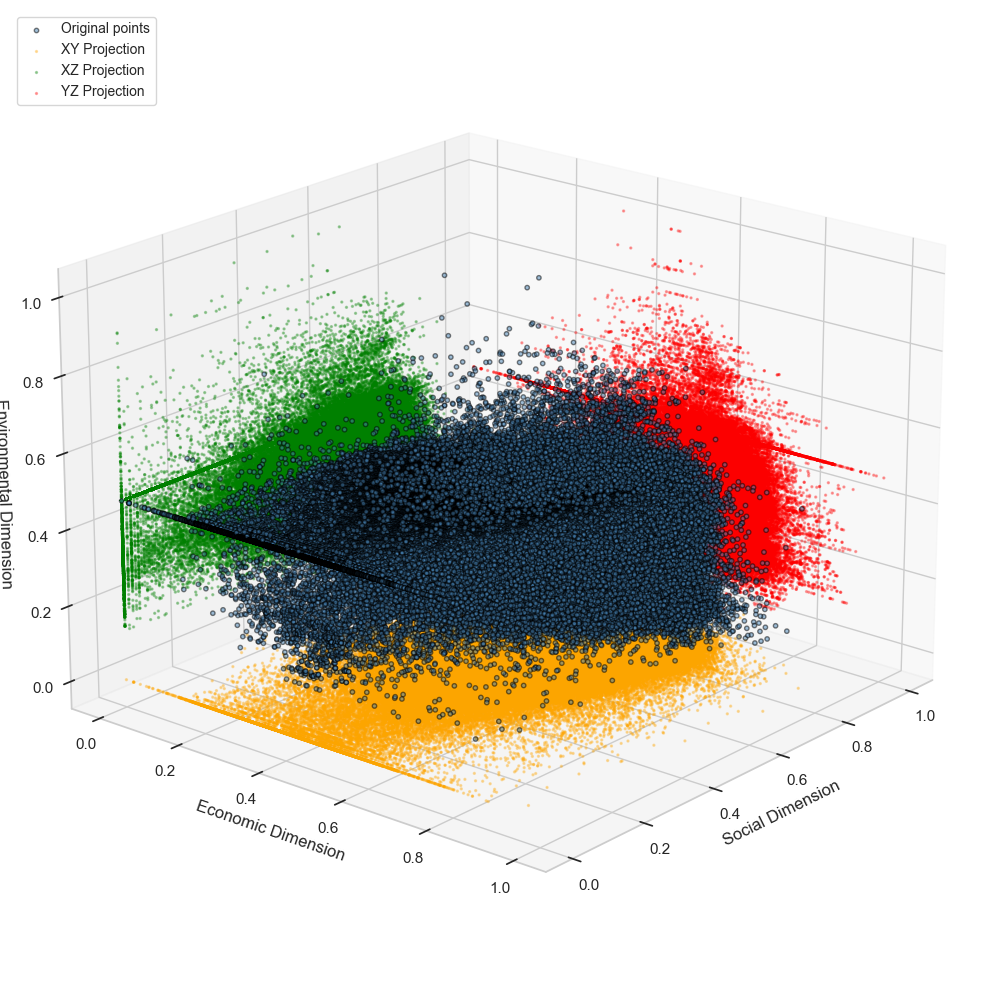

In [234]:
# Create 3D figure
fig_3d = plt.figure(figsize=(10, 10))
ax = fig_3d.add_subplot(111, projection='3d')

# Input data vectors
x = df_scaled['log_VIT202311'].values        # Social dimension (Vitality Index)
y = df_scaled['log_NTL2023_focal'].values    # Economic dimension (Nighttime Light)
z = df_scaled['UHIDAY2020_07_inv'].values    # Environmental dimension (Inverted UHI)

# Main 3D scatter plot
ax.scatter(x, y, z, c='steelblue', alpha=0.5, s=10, edgecolors='black', label='Original points')

# Compute min and max values for projection planes
x_min, y_min, z_min = np.min(x), np.min(y), np.min(z)
x_max, y_max, z_max = np.max(x), np.max(y), np.max(z)

# XY-plane projection (Z fixed)
ax.scatter(x, y, np.full_like(x, z_min), c='orange', alpha=0.3, s=2, label='XY Projection')

# XZ-plane projection (Y fixed)
ax.scatter(x, np.full_like(y, y_min), z, c='green', alpha=0.3, s=2, label='XZ Projection')

# YZ-plane projection (X fixed)
ax.scatter(np.full_like(x, x_max), y, z, c='red', alpha=0.3, s=2, label='YZ Projection')

ax.set_xlabel('Social Dimension', fontsize=12)
ax.set_ylabel('Economic Dimension', fontsize=12)
ax.set_zlabel('Environmental Dimension', fontsize=12)
ax.invert_xaxis()
ax.view_init(elev=20, azim=40)
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

## Clustering & Pareto filtering

- Noise Reduction: Clustering smooths out local noise and minor fluctuations, helping highlight robust, structurally meaningful Pareto-optimal patterns rather than outliers.
- Improved Surface Fitting: Fitting a surface to a smaller, cleaner set of optimal points improves the quality and interpretability of the Pareto frontier approximation.
- Scalable Evaluation Framework: Once the Pareto front is established from cluster centers, it can be used to evaluate the entire dataset efficiently by calculating distances to the frontier.

In [235]:
# X_std = df_scaled[targets_processed].values

# from sklearn.cluster import KMeans
# import pandas as pd
# from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
# k_list = [500, 1000, 1500, 2000, 3000, 5000]  # Modify this list as needed
# pareto_results = {}

# for k in k_list:
#     print(f"\n▶ Running KMeans for k = {k}")
    
#     # Run KMeans clustering
#     kmeans = KMeans(n_clusters=k, random_state=42).fit(X_std)
#     centers_std = kmeans.cluster_centers_
#     centers_original = scaler.inverse_transform(centers_std)

#     # Perform Pareto filtering
#     F_inv = -1 * centers_original  # Convert to minimization problem
#     nds = NonDominatedSorting()
#     pareto_idx = nds.do(F_inv, only_non_dominated_front=True)
#     pareto_centers = centers_original[pareto_idx]

#     # Build output DataFrame
#     df = pd.DataFrame(pareto_centers, columns=targets_processed)
#     df['Global_ID'] = [f"cluster_{i}" for i in pareto_idx]
#     df = df[['Global_ID'] + targets_processed]

#     # Store the result
#     pareto_results[f"k{k}"] = df
#     print(f"Selected {len(df)} Pareto-optimal cluster centers for k = {k}")

In [236]:
# df_pareto_centers_k1000 = pareto_results['k1000']
# df_pareto_centers_k1000.describe()

In [237]:
# import os

# # Ensure the output folder exists
# os.makedirs("output", exist_ok=True)

# # Loop through results and save each DataFrame to CSV
# for k in [500, 1000, 1500, 2000, 3000, 5000]:
# # for k in [1000]:
#     df = pareto_results[f'k{k}']
#     output_path = f"../output/pareto_centers_k{k}.csv"
#     df.to_csv(output_path, index=False)
#     print(f"Saved: {output_path}")

## PPF fit & Efficiency calculate

In [238]:
df_pareto_centers = pd.read_csv(r"../output/pareto_centers/pareto_centers_k5000.csv")
print(df_pareto_centers.shape)
df_pareto_centers.head(5)

(49, 4)


Global_ID  log_NTL2023_focal  log_VIT202311  UHIDAY2020_07_inv
0  cluster_231               0.56           0.35               0.90
1  cluster_422               0.80           0.62               0.57
2  cluster_508               0.68           0.79               0.51
3  cluster_758               0.50           0.58               0.98
4  cluster_795               0.70           0.83               0.47

In [239]:
surface_data = df_pareto_centers
sample_data = grid500

# Define variables for the original column names to be used
x_col = 'log_NTL2023_focal'
y_col = 'log_VIT202311'
z_col = 'UHIDAY2020_07_inv'
XY = df_pareto_centers[['log_VIT202311', 'log_NTL2023_focal']].values
z = df_pareto_centers['UHIDAY2020_07_inv'].values

# Extract the 3D points that define the surface.
surface_points = surface_data[[x_col, y_col, z_col]].values

# Surface interpolation using RBF
print("Fitting RBFInterpolator model...")
smoothing_factor = 0.05
rbf_model = RBFInterpolator(XY, z, kernel='thin_plate_spline', smoothing=smoothing_factor)  # or {'thin_plate_spline', 'linear', 'cubic', 'quintic'}

# To calculate the distance, create a dense cloud of points on the RBF surface.
print("Creating a dense point cloud of the fitted surface...")
grid_density = 300 # Higher density means more accurate distances but more computation
x_dense = np.linspace(surface_points[:, 0].min(), surface_points[:, 0].max(), grid_density)
y_dense = np.linspace(surface_points[:, 1].min(), surface_points[:, 1].max(), grid_density)
Xg, Yg = np.meshgrid(x_dense, y_dense)
XY_grid = np.vstack([Xg.ravel(), Yg.ravel()]).T

# Predict the Z values for the dense grid to form the surface points
Zg = rbf_model(XY_grid)
dense_surface_points = np.hstack([XY_grid, Zg.reshape(-1, 1)])

# Calculate true Euclidean distance to surface using KDTree
# Build the KDTree from the dense surface point cloud
print("Building KDTree for efficient distance calculation...")
surface_tree = KDTree(dense_surface_points)

# Extract the 3D coordinates of the sample points
sample_points_3d = sample_data[[x_col, y_col, z_col]].values

# For each sample point, find the distance to the nearest point on the dense surface
print("Querying KDTree to find shortest distances...")
distances, _ = surface_tree.query(sample_points_3d)

# Add the calculated distances as a new column to the dataframe
sample_data['distance_to_surface'] = distances

# The performance is defined as 1 minus the normalized distance
min_dist = distances.min()
max_dist = distances.max()

# Normalize the distances to be between 0 and 1
epsilon = 1e-9
normalized_distances = (distances - min_dist) / (max_dist - min_dist + epsilon)

# The performance score is 1 minus the normalized distance
performance_score = 1 - normalized_distances

# Add the performance score as a new column
sample_data['performance_score'] = performance_score

Fitting RBFInterpolator model...
Creating a dense point cloud of the fitted surface...
Building KDTree for efficient distance calculation...
Querying KDTree to find shortest distances...


In [240]:
sample_data['performance_score'].describe()

count   194941.00
mean         0.66
std          0.14
min          0.00
25%          0.59
50%          0.68
75%          0.75
max          1.00
Name: performance_score, dtype: float64


Generating visualization...


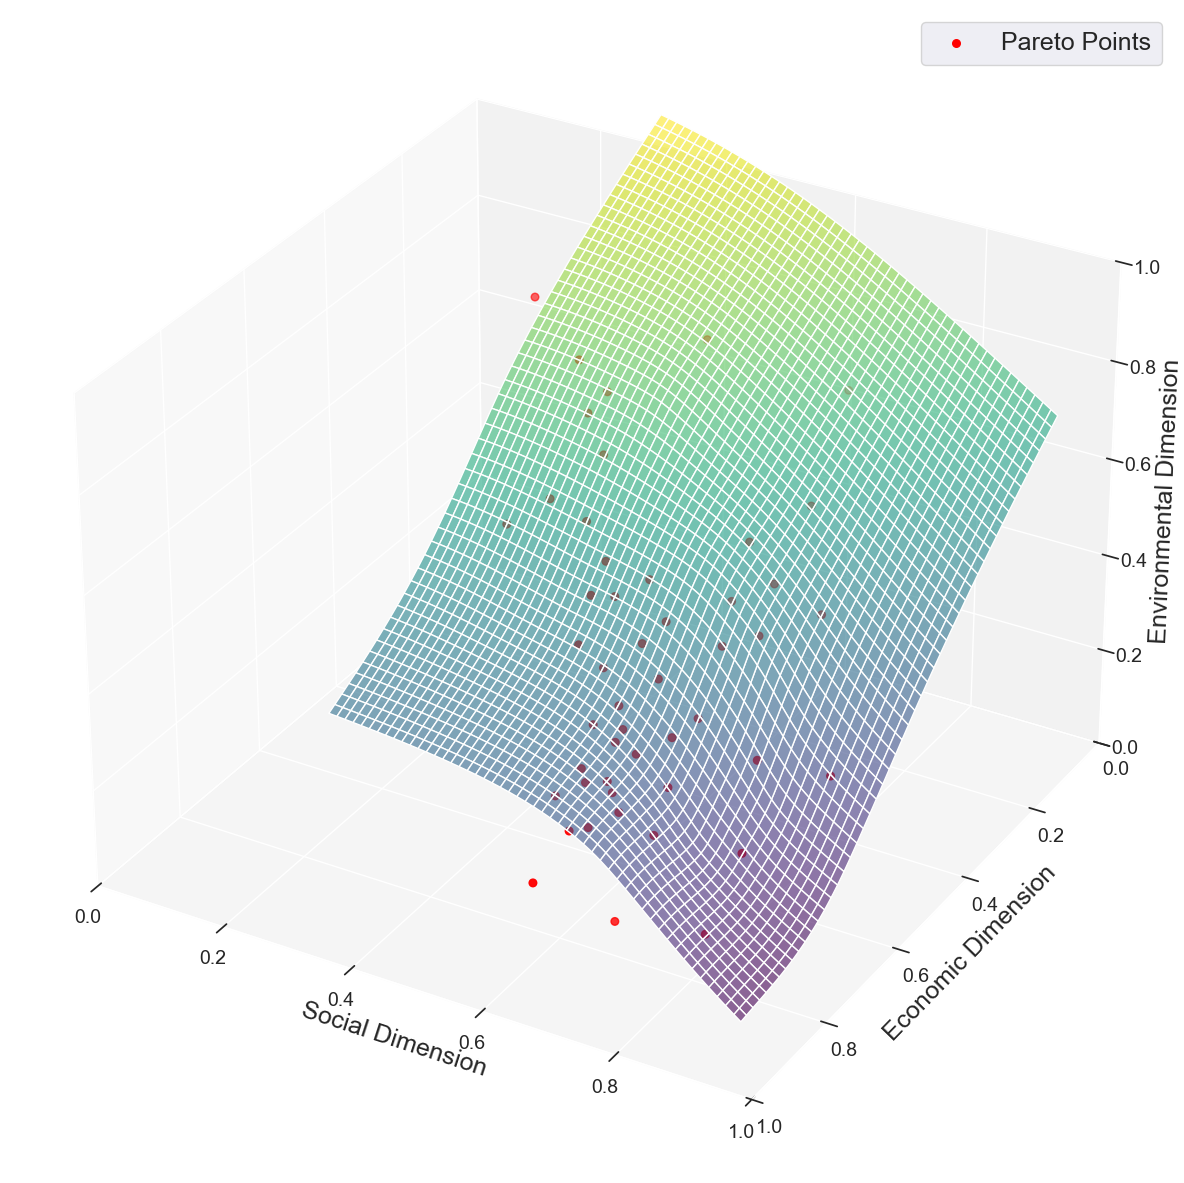

In [329]:
# Visualize surface and Pareto points
print("\nGenerating visualization...")
fig = plt.figure(figsize=(12, 18))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white') 
ax.set_facecolor('white')
# X_range_min = np.min(x_dense)
# X_range_max = np.max(x_dense)

# Y_range_min = np.min(y_dense)
# Y_range_max = np.max(y_dense)

# Z_range_min = np.min(Zg)
# Z_range_max = np.max(Zg)

# print(f"X (log_VIT202311): [{X_range_min:.4f}, {X_range_max:.4f}]")
# print(f"Y (log_NTL2023_focal): [{Y_range_min:.4f}, {Y_range_max:.4f}]")
# print(f"Z (UHIDAY2020_07_inv): [{Z_range_min:.4f}, {Z_range_max:.4f}]")

# For visualization, we can use the same meshgrid as for the dense points
ax.plot_surface(Xg, Yg, Zg.reshape(Xg.shape), cmap='viridis', alpha=0.6)

# Plot the original Pareto points that were used to define the surface.
ax.scatter(surface_points[:, 0], surface_points[:, 1], surface_points[:, 2], 
           c='red', 
           s=30, # size of points
           depthshade=True, # Add a shadow effect for depth
           label='Pareto Points')

# Set labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
ax.set_zlim(0, 1) 

ax.set_xlabel('Social Dimension', fontsize=18) # \n(log_VIT202311)
ax.set_ylabel('Economic Dimension', fontsize=18) # \n(log_NTL2023_focal)
ax.set_zlabel('Environmental Dimension', fontsize=18) # \n(UHIDAY2020_07_inv)
ax.legend(fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='z', labelsize=14)

plt.tight_layout()

# Save the figure
# plt.savefig('pareto_surface_visualization_rbf.png')

### Performance score analyses

In [242]:
sample_data['performance_score'].describe()

count   194941.00
mean         0.66
std          0.14
min          0.00
25%          0.59
50%          0.68
75%          0.75
max          1.00
Name: performance_score, dtype: float64

In [243]:
# city-level
distribution = sample_data.groupby('City')['performance_score'].agg(
    [('Count', 'count'), 
     ('Mean', 'mean'),     
     ('Median', 'median'), 
     ('Std Dev', 'std'),   
     ('Min', 'min'),       
     ('Max', 'max')]       
).round(2)

distribution
distribution.to_csv("../output/performance_score_analyses/performance_score_city.csv")

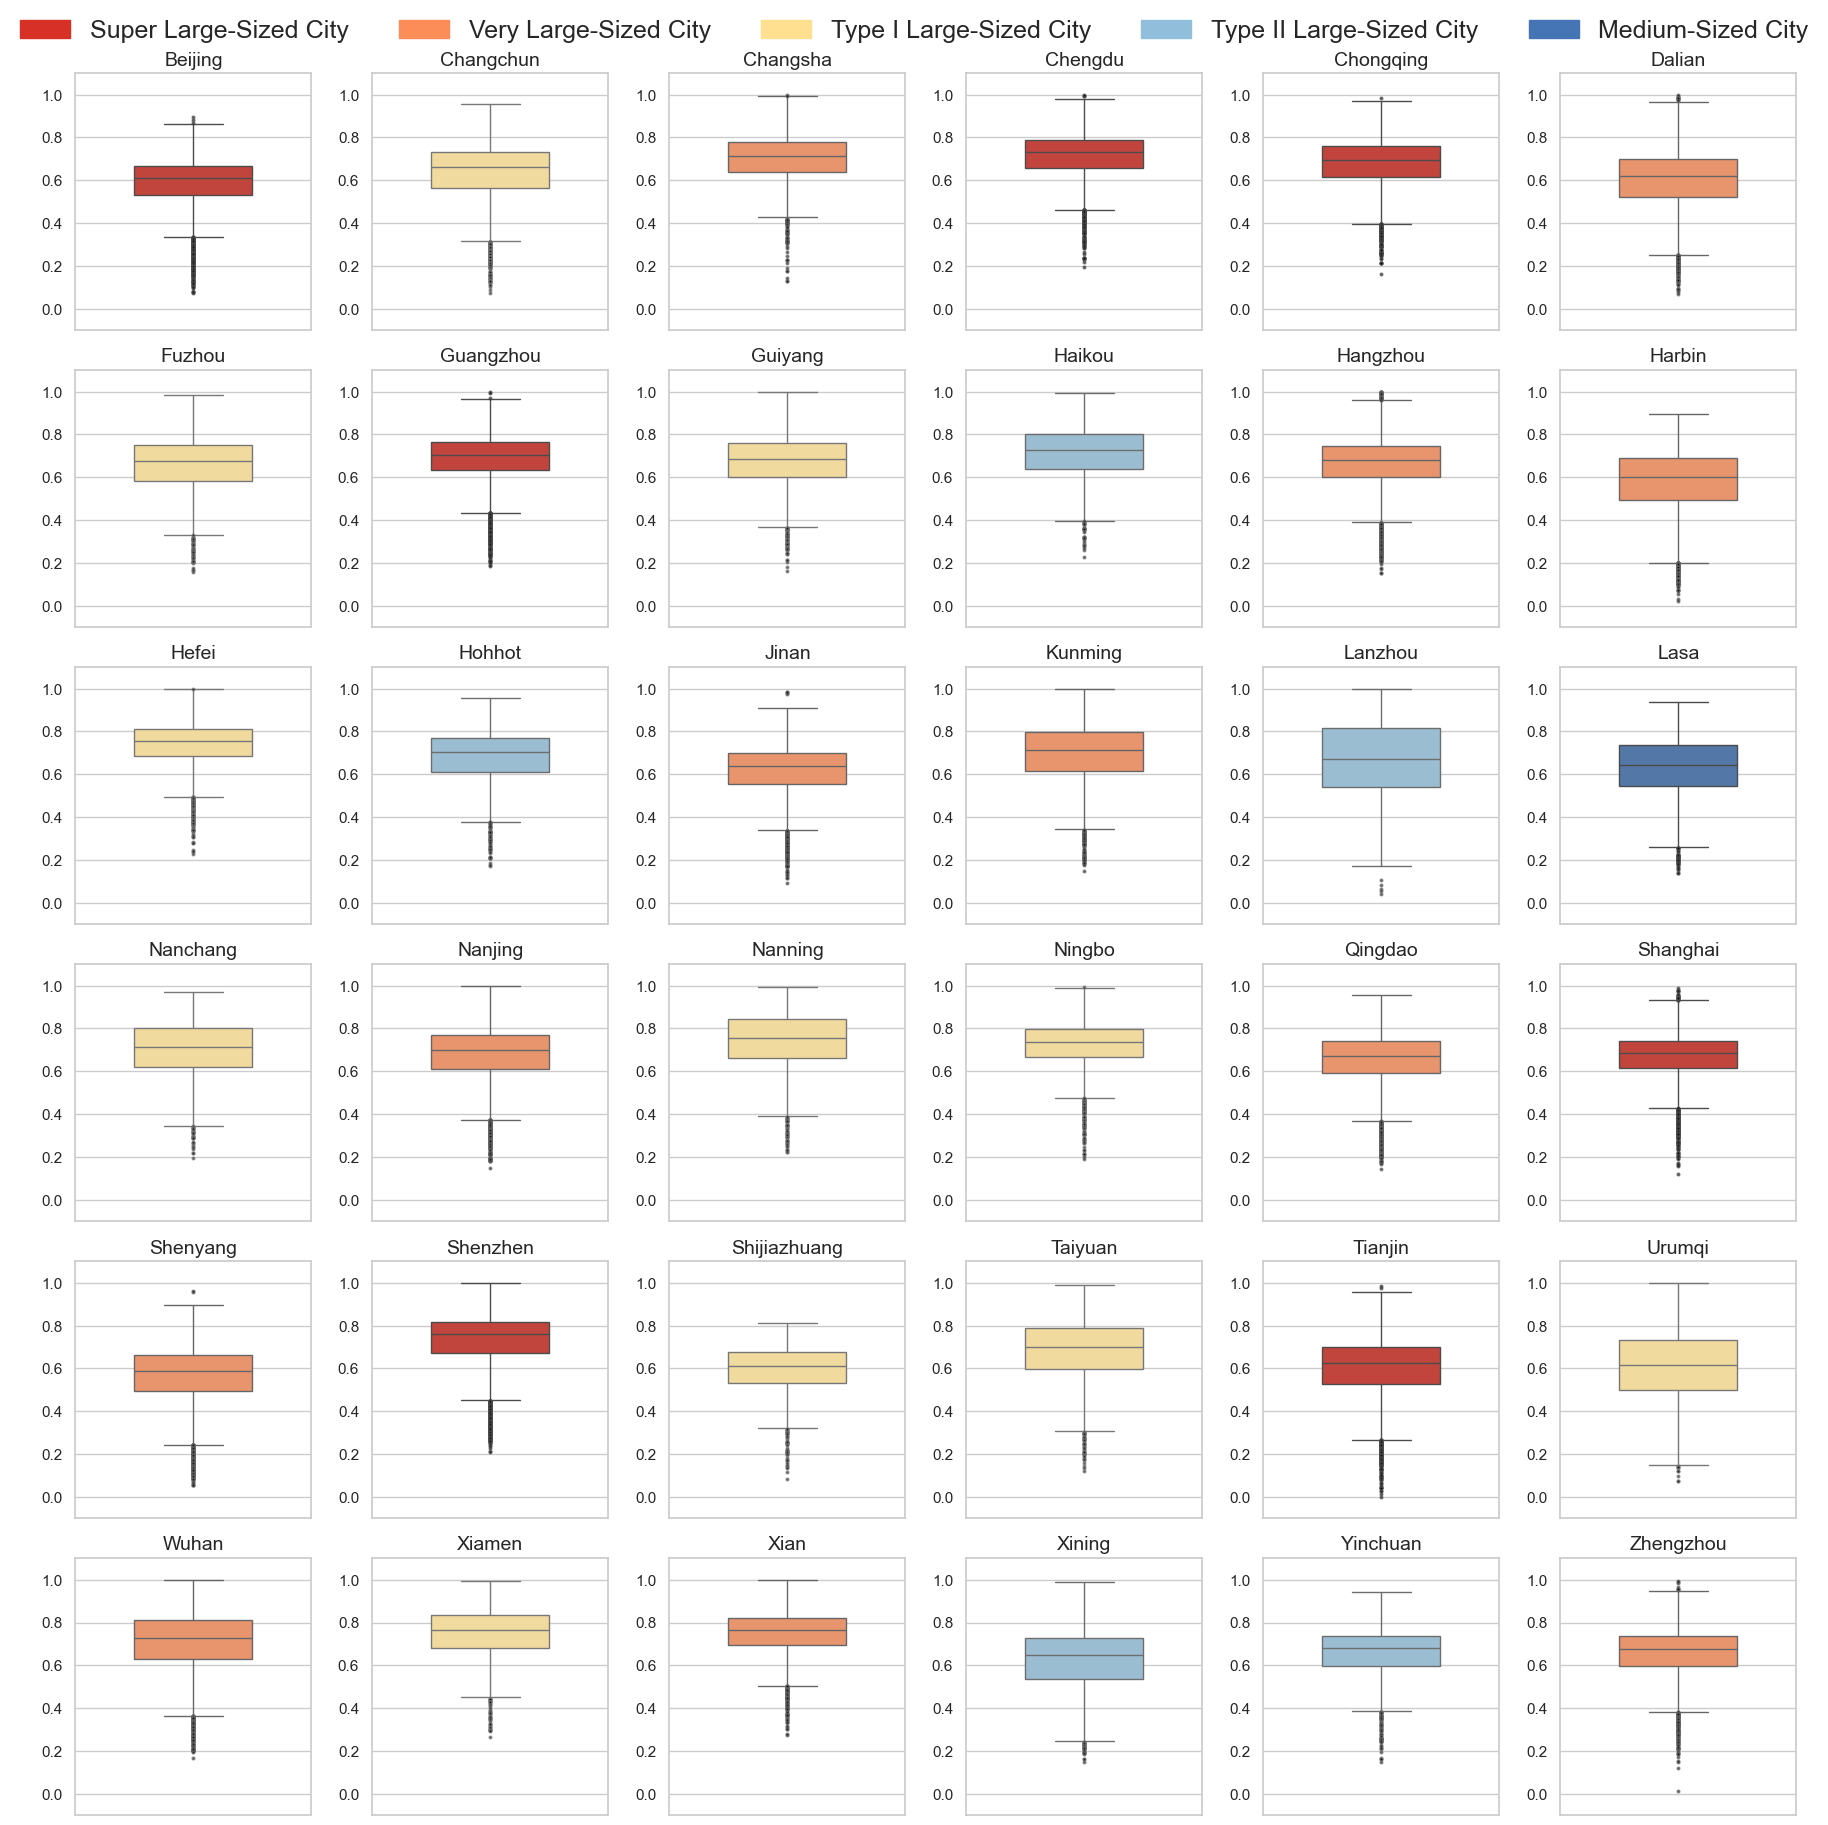

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# 1. Setup Data & Mappings
# -------------------------
# Define your colors for each category
category_colors = {
    'Super Large-Sized City': '#d73027',  # Red
    'Very Large-Sized City': '#fc8d59',   # Orange
    'Type I Large-Sized City': '#fee090', # Yellow/Cream
    'Type II Large-Sized City': '#91bfdb',# Light Blue
    'Medium-Sized City': '#4575b4'        # Dark Blue
}

# Invert your existing dictionary for easier lookup (City -> Category)
city_categories = {
    'Super Large-Sized City': ['Beijing', 'Tianjin', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Chongqing', 'Chengdu'],
    'Very Large-Sized City': ['Shenyang', 'Harbin', 'Nanjing', 'Hangzhou', 'Jinan', 'Zhengzhou', 'Wuhan', 'Changsha', 'Kunming', 'Xian', 'Dalian', 'Qingdao'],
    'Type I Large-Sized City': ['Shijiazhuang', 'Taiyuan', 'Changchun', 'Hefei', 'Fuzhou', 'Nanchang', 'Nanning', 'Guiyang', 'Urumqi', 'Ningbo', 'Xiamen'],
    'Type II Large-Sized City': ['Hohhot', 'Haikou', 'Lanzhou', 'Xining', 'Yinchuan'],
    'Medium-Sized City': ['Lasa']
}

city_to_category = {}
for category, city_list in city_categories.items():
    for city in city_list:
        city_to_category[city] = category

# 2. Setup Plotting
# -----------------
fig, axes = plt.subplots(6, 6, figsize=(18, 18))
axes = axes.flatten()

flier_style = dict(
    marker='o',
    markerfacecolor='black',
    markersize=2,
    linestyle='None',
    alpha=0.6
)

for i, city in enumerate(cities):
    ax = axes[i]
    
    # Determine the color based on the city's category
    # Default to grey if city is missing from the dict
    cat = city_to_category.get(city, "Unknown")
    box_color = category_colors.get(cat, "lightgrey")
    
    sns.boxplot(
        data=sample_data[sample_data['City'] == city],
        y="performance_score",
        ax=ax,
        color=box_color, # <--- Apply the specific color here
        showfliers=True,
        flierprops=flier_style,
        width=0.5        # Optional: makes boxes narrower like the reference image
    )
    
    ax.set_title(city, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_ylim(-0.1, 1.1)

# Clean up empty subplots
for j in range(len(cities), 36):
    fig.delaxes(axes[j])

# 3. Create a Custom Legend (Essential for this style)
# ----------------------------------------------------
# Create handle objects for the legend
legend_patches = [
    mpatches.Patch(color=color, label=label) 
    for label, color in category_colors.items()
]

# Place legend at the top of the figure
fig.legend(
    handles=legend_patches, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.02), # Push slightly above the plot
    ncol=5,                     # Arrange horizontally
    fontsize=18,
    frameon=False
)

plt.tight_layout()
plt.show()

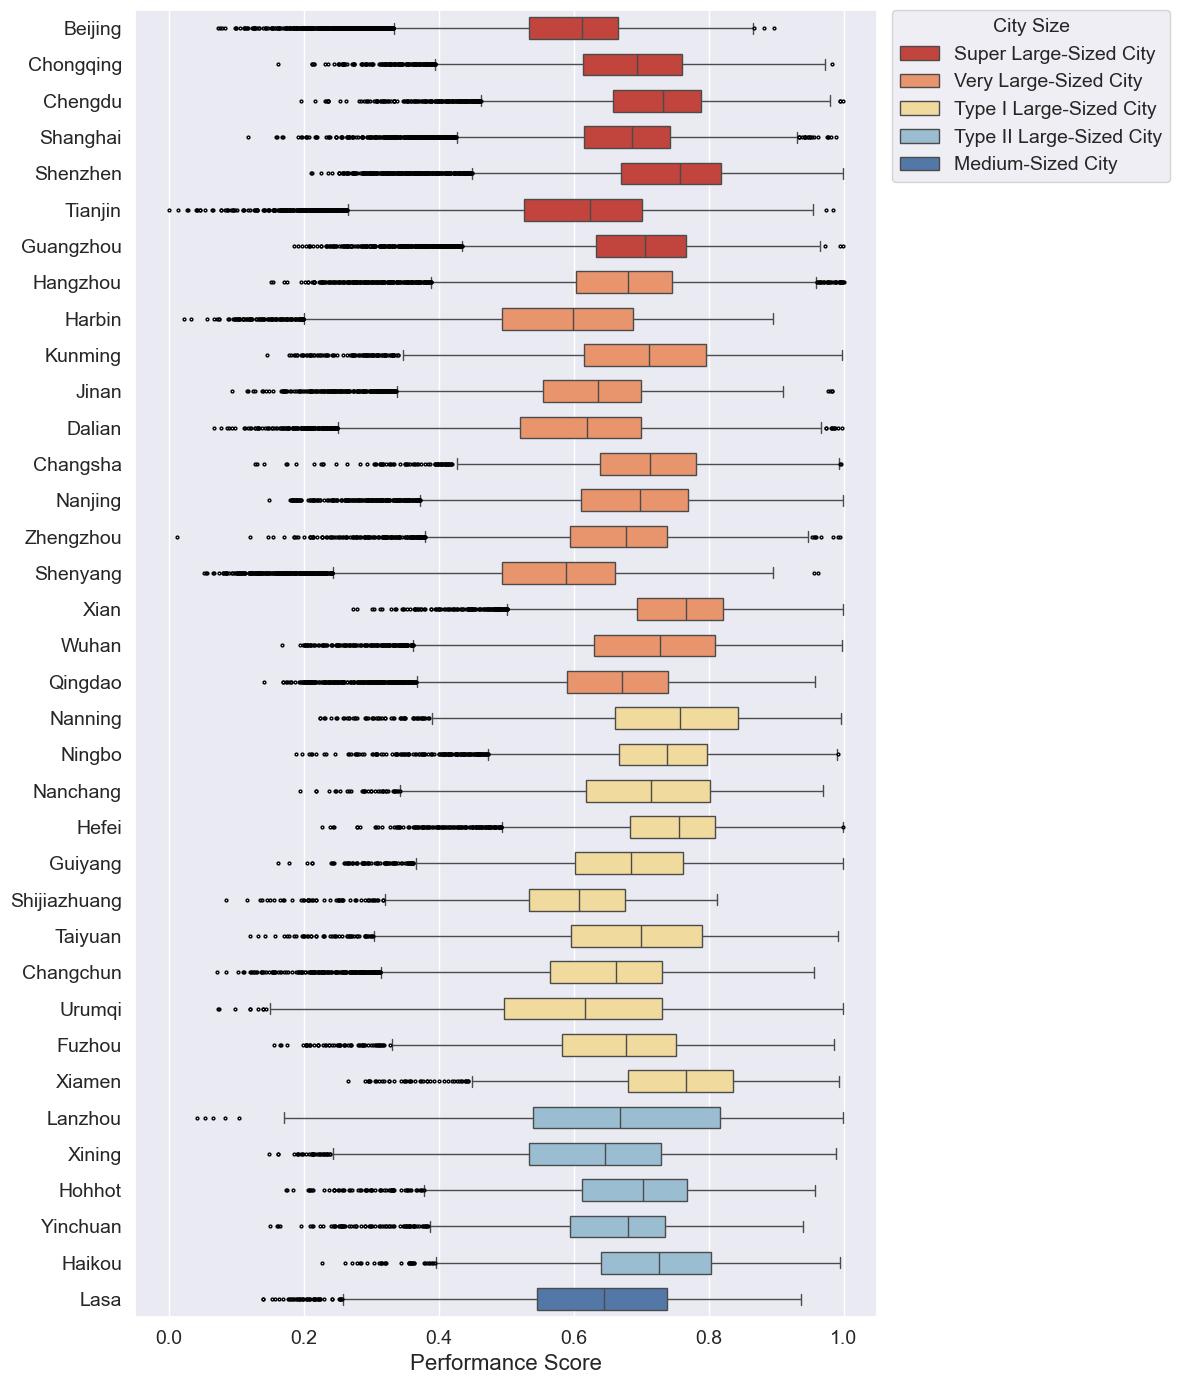

In [246]:
# 1. Prepare Data
# Invert dictionary to map City -> Category
city_to_category = {}
for category, city_list in city_categories.items():
    for city in city_list:
        city_to_category[city] = category

# Apply this mapping to create a new column
sample_data['City_Category'] = sample_data['City'].map(city_to_category)

# Create a custom sort order based on your category keys
category_order = list(city_categories.keys())
sample_data['City_Category'] = pd.Categorical(
    sample_data['City_Category'], 
    categories=category_order, 
    ordered=True
)
sample_data = sample_data.sort_values('City_Category')

# 2. Setup Plotting
sns.set_theme(style="darkgrid") 
fig, ax = plt.subplots(figsize=(12, 14))

# Define colors
category_colors = {
    'Super Large-Sized City': '#d73027',
    'Very Large-Sized City': '#fc8d59',
    'Type I Large-Sized City': '#fee090',
    'Type II Large-Sized City': '#91bfdb',
    'Medium-Sized City': '#4575b4'
}

# Define fliers
flier_style = dict(
    marker='o',
    # markerfacecolor='black',
    markeredgecolor='black',
    markersize=2,
    linestyle='None',
    alpha=1
)

# 3. Create the Horizontal Boxplot
sns.boxplot(
    data=sample_data,
    x="performance_score",  # Numeric variable on X
    y="City",               # Categorical variable on Y
    hue="City_Category",    # Color based on category
    palette=category_colors,
    dodge=False,            # Important: prevents boxes from shrinking
    width=0.6,              # Adjusts thickness of the bars
    ax=ax,
    flierprops=flier_style
)

# 4. Formatting
# ax.set_title("Performance Score by City", fontsize=16, fontweight='bold')
ax.set_xlabel("Performance Score", fontsize=16)
ax.set_ylabel("")

ax.legend(
    title='City Size', 
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    fontsize=14,
    title_fontsize=14
)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig("../output/performance_score_analyses/city_level_boxplot.png", dpi=600)
plt.show()

In [ ]:
# Define the logical order for the y-axis
custom_order = [
    'Super Large-Sized City', 
    'Very Large-Sized City', 
    'Type I Large-Sized City', 
    'Type II Large-Sized City', 
    'Medium-Sized City'
]

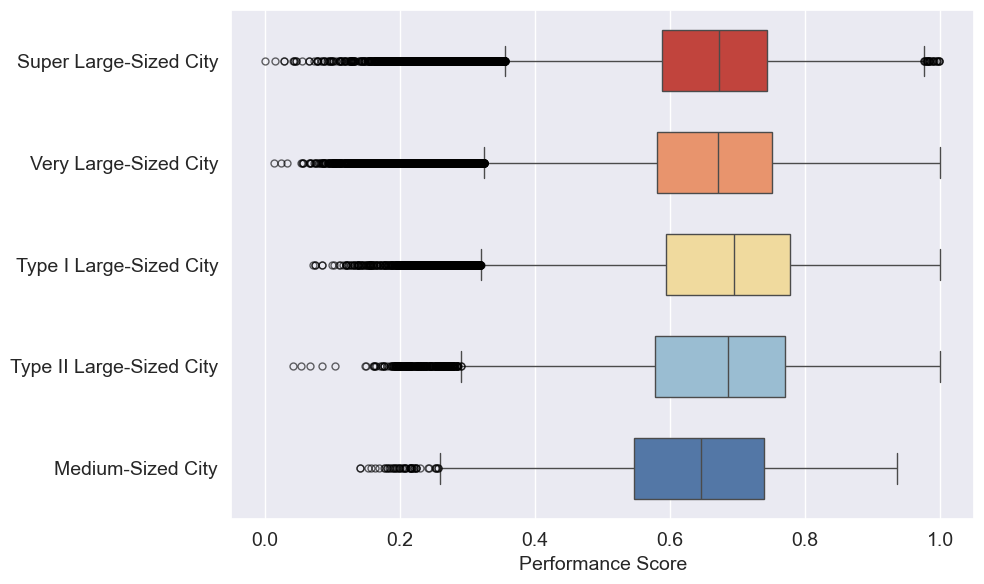

In [ ]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))

flier_style = dict(
    marker='o',
    # markerfacecolor='black',
    markeredgecolor='black',
    markersize=5,
    linestyle='None',
    alpha=0.6
)

sns.boxplot(
    data=sample_data,
    x="performance_score",
    y="City_Category",      # <--- The key change: Aggregating by Category
    order=custom_order,     # <--- Force the logical hierarchy
    palette=category_colors,
    width=0.6,
    ax=ax,
    flierprops=flier_style
)

# Formatting
# ax.set_title("Performance Score Distribution by City Size", fontsize=14, fontweight='bold')
ax.set_xlabel("Performance Score", fontsize=14)
ax.set_ylabel("", fontsize=14)

# Adjust tick label size
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Since the Y-labels explain the colors, you don't need a separate legend.
plt.tight_layout()
plt.show()

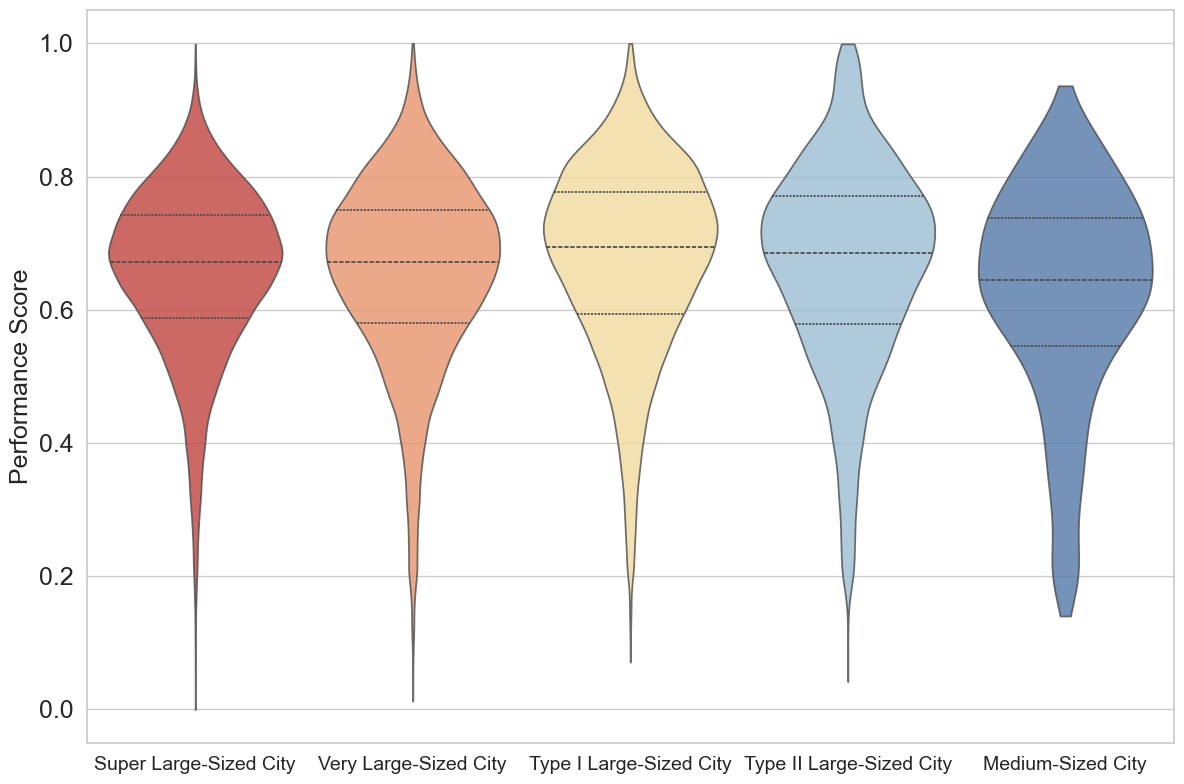

In [336]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="ticks")

sns.violinplot(
    data=sample_data,
    y="performance_score",
    x="City_Category",
    order=custom_order,
    palette=category_colors,
    inner="quartile", 
    cut=0,
    ax=ax,
    alpha=0.8
)

# ax.set_title("Performance Score Density (Violin Plot)", fontsize=18)
ax.set_ylabel("Performance Score", fontsize=18)
ax.set_xlabel("", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.savefig("../output/performance_score_analyses/category_boxplot.png", dpi=600)
plt.show()

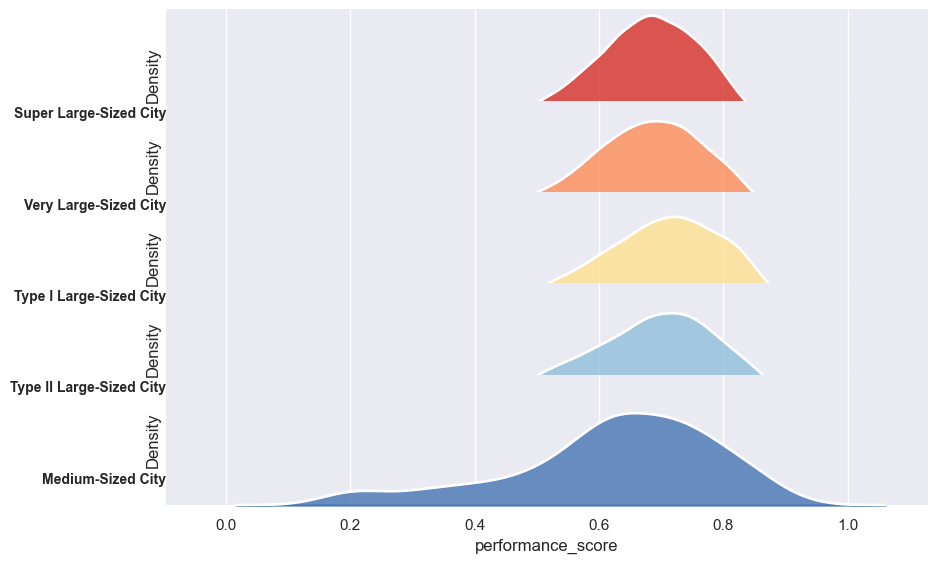

In [ ]:
# Create a FacetGrid (one row per category)
g = sns.FacetGrid(
    sample_data, 
    row="City_Category", 
    hue="City_Category", 
    aspect=7, 
    height=1.2, 
    palette=category_colors,
    row_order=custom_order
)

# Draw the densities
g.map(sns.kdeplot, "performance_score", clip_on=False, shade=True, alpha=0.8, lw=1.5)
g.map(sns.kdeplot, "performance_score", clip_on=False, color="w", lw=2) # White outline

# Formatting to make it look like a Ridgeline
g.fig.subplots_adjust(hspace=-0.3) # Overlap the plots
g.set_titles("") # Remove default titles
g.set(yticks=[]) # Remove y-ticks
g.despine(bottom=True, left=True)

# Add labels manually to the left
for ax, label in zip(g.axes.flat, custom_order):
    ax.text(0, 0.2, label, fontweight="bold", fontsize=10, 
            ha="right", va="center", transform=ax.transAxes)

plt.show()

# Model training

In [ ]:
grid500.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14               0.37   
std     56862.94     19.36          17.87    1821.23               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     49033.00     15.06          15.64     206.86               0.30   
50%     97800.00     25.85          26.01     731.14               0.38   
75%    147135.00     38.67          38.17    2003.43               0.47   
max    196769.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightOtherness  \
count    194941.00    194941.00      194941.00        194941.00   
mean         20.83         0.10           0.00             0.30   
std          23.99         0.17           0.00             0.28   
min           0.00         0.00           0.00             0.00   
25%           0.00         0.02           0.00             0.00   
50%          15.00         0.04           0.00             0.28   
75%          28.00         0.09           0.01             0.43   
max         532.00         1.00           0.09             2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       footprintAreaTotal  totalArea    areaVariance  avgBuildingArea  \
count           194941.00  194941.00       194941.00        194941.00   
mean             33192.68  216494.27    191423545.70          5437.01   
std              27474.13  210010.02   2300870309.71          7776.02   
min                  0.00       0.00            0.00             0.00   
25%               8888.17   37241.51      3519241.57          1875.57   
50%              29057.71  157756.72     20726892.83          4027.77   
75%              51784.69  347326.83     74777609.98          6726.97   
max             226640.62 3672930.95 662000000000.00        664544.83   

       parcelArea  largestPatchIndex  shape3DIndex       SVF  evennessIndex  \
count   194941.00          194941.00     194941.00 194941.00      194941.00   
mean    180006.93 

In [ ]:
# grid500.to_csv(r"../output/grid500_performance_score.csv")

In [ ]:
grid500 = pd.read_csv(r"../output/grid500_performance_score.csv", index_col=0)

In [ ]:
# gdb_path = r"D:\008RA\gis_process\CN_City36\CN_City36_t1.gdb"
# layer_name = "全国网格"

# gdf = gpd.read_file(gdb_path, layer=layer_name)

# gdf_joined = gdf.merge(grid500, on="Global_ID", how="left")

# output_gdb = r"D:\008RA\gis_process\CN_City36\CN_City36_t2.gdb"
# output_layer = "全国网格_绩效t7"

# pyogrio.write_dataframe(
#     gdf_joined,
#     output_gdb,
#     layer=output_layer,
#     driver="OpenFileGDB"
# )

In [32]:
# Set global random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Ensure output directories exist
os.makedirs("../output/models", exist_ok=True)
os.makedirs("../output/param_logs", exist_ok=True)

# ========================= XGBoost Training Loop =========================
targets = ['performance_score']

In [ ]:
# train_rmse = root_mean_squared_error(y_train, y_pred_train)
# test_rmse = root_mean_squared_error(y_test, y_pred_test)
# test_r2 = r2_score(y_test, y_pred_test)

# print(f"Train RMSE: {train_rmse:.4f}")
# print(f"Test  RMSE: {test_rmse:.4f}")
# print(f"Test   R² : {test_r2:.4f}")

# print("\n✅ All models trained successfully.")

In [ ]:
# # Set global random seed for reproducibility
# SEED = 42
# np.random.seed(SEED)

# # Ensure output directories exist
# os.makedirs("../output/models2", exist_ok=True)
# os.makedirs("../output/param_logs2", exist_ok=True)

# # ========================= XGBoost Training Loop =========================
# targets = ['performance_score']

# for target in targets:
#     print(f"\n===== Training model for target: {target} =====")

#     # Filter rows with non-missing values for target and features
#     df_target = grid500.copy()
    
#     # Split features and target
#     X = df_target[features]
#     y = df_target[target]

#     # Train-test split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=SEED
#     )

#     print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

#     # Define base XGBoost model
#     xgb_model = xgb.XGBRegressor(
#         objective='reg:squarederror',
#         device='cuda',
#         random_state=SEED,
#         n_jobs=-1
#     )

#     # Randomized hyperparameter search
#     param_dist = {
#         'n_estimators': [500, 1000], 
#         'learning_rate': [0.01, 0.05, 0.1],
#         'max_depth': [5, 7, 9],
#         'subsample': [0.7, 0.8, 0.9],
#         'colsample_bytree': [0.7, 0.8, 0.9],
#         'min_child_weight': [10, 30, 50],
#         'reg_alpha': [0.1, 1, 10],
#         'reg_lambda': [1, 5, 10],
#     }
    
#     random_search = RandomizedSearchCV(
#         estimator=xgb_model,
#         param_distributions=param_dist,
#         n_iter=200,
#         cv=5,
#         scoring='neg_mean_squared_error',
#         verbose=1,
#         random_state=SEED
#     )

#     # Fit model
#     random_search.fit(X_train, y_train)

#     # Retrieve best estimator
#     best_model = random_search.best_estimator_

#     # Save trained model
#     model_path = f"../output/models2/{target}_xgb_model.pkl"
#     joblib.dump(best_model, model_path)
#     print(f"✔ Saved best model to: {model_path}")

#     # Save best hyperparameters
#     best_params = random_search.best_params_
#     param_path = f"../output/param_logs2/{target}_best_params.json"
#     with open(param_path, 'w') as f:
#         json.dump(best_params, f, indent=4)
#     print(f"✔ Saved best parameters to: {param_path}")

#     # Evaluate model performance
#     y_pred_train = best_model.predict(X_train)
#     y_pred_test = best_model.predict(X_test)

#     train_rmse = root_mean_squared_error(y_train, y_pred_train)
#     test_rmse = root_mean_squared_error(y_test, y_pred_test)
#     test_r2 = r2_score(y_test, y_pred_test)

#     print(f"Train RMSE: {train_rmse:.4f}")
#     print(f"Test  RMSE: {test_rmse:.4f}")
#     print(f"Test   R² : {test_r2:.4f}")

# print("\n✅ All models trained successfully.")

# Model interpreting

## Model evaluation metrics

In [ ]:
model_dir = "../output/models"
models = {}

# Loop through each target, load the model and store in dict
targets = ['performance_score']
for target in targets:
    model_path = os.path.join(model_dir, f"{target}_xgb_model.pkl")
    if os.path.exists(model_path):
        models[target] = joblib.load(model_path)
        print(f"✔ Loaded model for {target}")
    else:
        print(f"⚠ Model file not found: {model_path}")

✔ Loaded model for performance_score


In [147]:
# Model re-evaluate
# Set random seed to match training split
SEED = 42

# Store evaluation metrics for each model
evaluation_results = {}

for target in targets:
    print(target)
    print(f"\n📊 Evaluating model: {target}")
    
    model = models[target]
    print(model.get_params())
    
    # Extract features and target from full dataset
    X = grid500[features].copy()
    y = grid500[target].copy()

    # Use the same split strategy as training
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute metrics
    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Store results
    evaluation_results[target] = {
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2
    }

# Convert to DataFrame
df_eval = pd.DataFrame.from_dict(evaluation_results, orient='index')
df_eval.reset_index(inplace=True)
df_eval.rename(columns={'index': 'Target'}, inplace=True)
df_eval = df_eval.round(6)

# Save to CSV
save_path = "../output/model_evaluation_summary.csv"
df_eval.to_csv(save_path, index=False)

df_eval

performance_score

📊 Evaluating model: performance_score
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': 50, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.9, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': None}


Target  Train_RMSE  Test_RMSE  Test_R2
0  performance_score        0.08       0.09     0.56

## Feature importance

### Sklearn

In [ ]:
# based on XGBoost
# Ensure the output folder exists
os.makedirs("../output/interpret_models", exist_ok=True)

# Dictionary to collect importance data
importance_all = {}

# Loop over targets to compute and store importance
for target in targets:
    model = models[target]
    booster = model.get_booster()
    importance_dict = booster.get_score(importance_type='gain')

    # Convert to DataFrame, fill missing features with 0
    importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=[f'Importance_{target}'])
    importance_df.index.name = 'Feature'
    importance_all[target] = importance_df

# Merge all importance DataFrames on 'Feature'
combined_importance = pd.concat(importance_all.values(), axis=1)
combined_importance.index.name = 'Feature'
combined_importance = combined_importance.fillna(0).reset_index()

# Optional: reorder by average importance across targets
mean_col = combined_importance.iloc[:, 1:].mean(axis=1)
combined_importance.insert(1, 'MeanImportance', mean_col)
combined_importance.sort_values(by='MeanImportance', ascending=False, inplace=True)

# Save to CSV
# combined_csv_path = "../output/interpret_models/feature_importance.csv"
# combined_importance.to_csv(combined_csv_path, index=False)
# print(f"✅ Combined feature importance saved to: {combined_csv_path}")
combined_importance

Feature  MeanImportance  Importance_performance_score
3    basePerimeterTotal            3.12                          3.12
9                   FAR            1.60                          1.60
7             totalArea            0.84                          0.84
12  intersectionDensity            0.78                          0.78
13           poiDensity            0.37                          0.37
11          roadDensity            0.34                          0.34
17            maxHeight            0.26                          0.26
19          heightRange            0.24                          0.24
28           parcelArea            0.18                          0.18
18            minHeight            0.17                          0.17
15                  FVC            0.16                          0.16
6    footprintAreaTotal            0.14                          0.14
14         poiDiversity            0.12                          0.12
10        coverageRatio            0.11                          0.11
23     cornerCountTotal            0.11                          0.11
38                  SVF            0.10                          0.10
16       permeableRatio            0.08                          0.08
21        heightDensity            0.06                          0.06
29    largestPatchIndex            0.06                          0.06
32       cornerCountAvg            0.06                          0.06
2             avgHeight            0.06                          0.06
0         buildingCount            0.06                          0.06
22      heightOtherness            0.05                          0.05
39          streetRatio            0.05                          0.05
1           totalHeight            0.05                          0.05
33    buildingProximity            0.05                          0.05
4      basePerimeterAvg            0.05                          0.05
31        evennessIndex            0.04                          0.04
8       avgBuildingArea            0.04                          0.04
27         areaVariance            0.04                          0.04
5           compactness            0.04                          0.04
24     basePerimeterMax            0.04                          0.04
26      shapeComplexity            0.04                          0.04
20          heightIndex            0.04                          0.04
25     basePerimeterMin            0.03                          0.03
30         shape3DIndex            0.03                          0.03
36      buildingDistAvg            0.03                          0.03
35      buildingMaxDist            0.03                          0.03
37      buildingDistVar            0.03                          0.03
34      buildingMinDist            0.03                          0.03

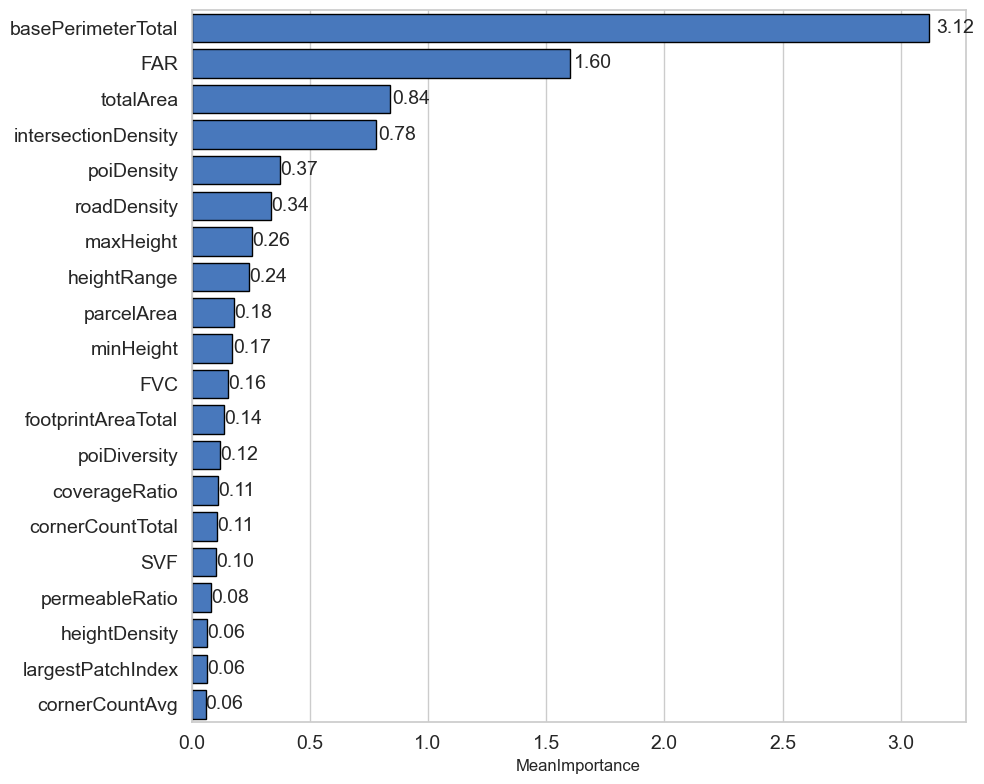

In [134]:
# 1. Select the Top N features to avoid overcrowding
top_n = 20  # Adjust this number based on your needs
plot_data = combined_importance.head(top_n)

# 2. Setup Plot
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid") # Clean background

# 3. Draw the Bar Chart
ax = sns.barplot(
    data=plot_data,
    x="MeanImportance",
    y="Feature",
    color="#3475d0", # Professional blue (or use palette='viridis')
    edgecolor="black" # Adds definition to bars
)

# 4. Formatting
# plt.title(f"Top {top_n} Feature Importance (XGBoost - Gain)", fontsize=16, fontweight='bold')
# plt.xlabel("Average Gain Importance", fontsize=14)
plt.ylabel("") # Remove 'Feature' label as it's obvious

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Add values to the end of the bars (optional but helpful)
for i, v in enumerate(plot_data['MeanImportance']):
    ax.text(v + (v * 0.01), i, f'{v:.2f}', va='center', fontsize=14)

plt.tight_layout()
plt.show()

### SHAP

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

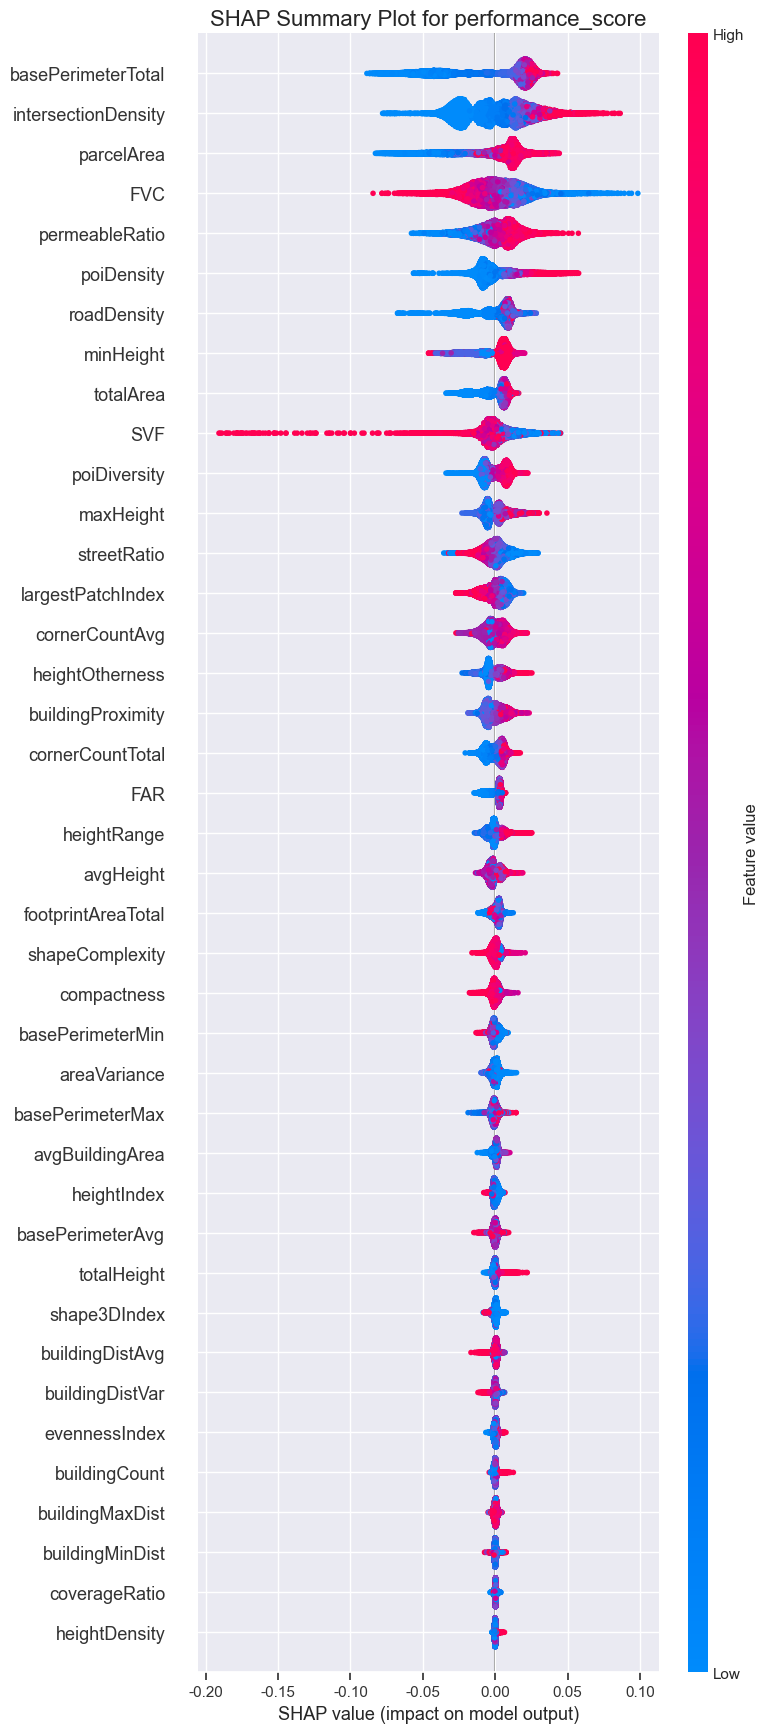

In [319]:
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1], show=False)
plt.title(f"SHAP Summary Plot for {target}", fontsize=16)
plt.tight_layout()
# Save the figure
plt.savefig(f"../output/interpret_models/shap_summary_beeswarm_{target}.png", dpi=300)
plt.show()

In [ ]:
# 4. Feature Importance Bar Chart
# This plot simplifies the view by showing the mean absolute SHAP value.
# It only shows "how much" a feature matters, not "how" (positive/negative) it affects the result.
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title(f"Mean Absolute SHAP Values for {target}", fontsize=16)
plt.tight_layout()
# Save the figure
# plt.savefig(f"../output/shap_importance_bar_{target}.png", dpi=300)
plt.show()

In [150]:
X_test.shape

(38989, 40)

In [151]:
X_test.head()

buildingCount  totalHeight  avgHeight  basePerimeterTotal  \
114631             67      1806.50      26.96             8993.41   
152409            110      2137.00      19.43            12272.06   
82786               5       129.00      25.80              568.61   
148798             14       264.00      18.86             1850.94   
129854             86      2222.00      25.84             9421.90   

        basePerimeterAvg  compactness  footprintAreaTotal  totalArea  \
114631            134.23         0.53            59724.81  550052.35   
152409            111.56         0.56            70852.96  482377.71   
82786             113.72         0.48             3109.02   25469.44   
148798            132.21         0.57            18810.25   80978.72   
129854            109.56         0.53            53383.15  455344.13   

        avgBuildingArea  FAR  coverageRatio  roadDensity  intersectionDensity  \
114631          8209.74 2.20           0.24            3                    4   
152409          4385.25 1.93           0.28            4                    5   
82786           5093.89 0.10           0.01            0                    0   
148798          5784.19 0.32           0.08            3                    0   
129854          5294.70 1.82           0.21            5                    3   

        poiDensity  poiDiversity  FVC  permeableRatio  maxHeight  minHeight  \
114631      700.00          1.79 0.43            0.69      63.00      12.00   
152409       16.00          1.04 0.45            0.68      27.00       3.00   
82786        16.00          0.00 0.99            0.95      31.00      12.00   
148798        8.00          0.00 0.83            0.97      24.00      12.00   
129854      792.00          2.30 0.55            0.70      57.00      12.00   

        heightRange  heightIndex  heightDensity  heightOtherness  \
114631        51.00         0.03           0.01             0.56   
152409        24.00         0.01           0.01             0.32   
82786         19.00         0.24           0.00             0.27   
148798        12.00         0.09           0.00             0.31   
129854        45.00         0.03           0.01             0.25   

        cornerCountTotal  basePerimeterMax  basePerimeterMin  shapeComplexity  \
114631               473            515.96              0.99             5.17   
152409               655            246.80              8.37             5.06   
82786                 29            151.50             66.86             5.99   
148798                73            438.64             31.70             5.02   
129854               753            279.30              0.61             5.21   

        areaVariance  parcelArea  largestPatchIndex  shape3DIndex  \
114631  173938692.00   233324.26               0.63          1.70   
152409   18670975.99   225575.15               0.60          0.01   
82786    21991036.43    34749.94               0.14          0.01   
148798  122999591.20    77345.23               0.31          0.01   
129854   24455778.44   232730.42               0.38          3.43   

        evennessIndex  cornerCountAvg  buildingProximity  buildingMinDist  \
114631         642.87            7.06              35.10             9.51   
152409         270.67            5.95              30.80             8.23   
82786           56.27            5.80              25.46            21.08   
148798         239.92            5.21              41.84             8.44   
129854         273.56            8.76              32.58             6.46   

        buildingMaxDist  buildingDistAvg  buildingDistVar  SVF  streetRatio  
114631           590.99           258.71          2527.68 0.77         0.96  
152409           662.06           270.01          1914.65 0.70         0.67  
82786            100.97            47.61            28.19 0.95         1.03  
148798           495.64           163.54          2559.58 0.97         0.94  
129854           701.68           

## SHAP PDP

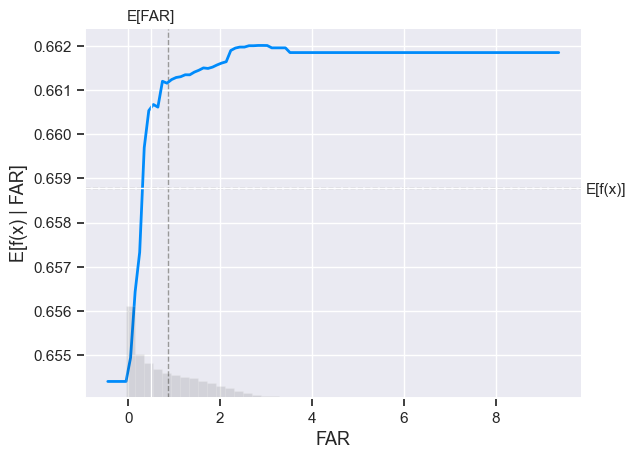

In [270]:
shap.partial_dependence_plot(
    "FAR",
    model.predict,
    X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

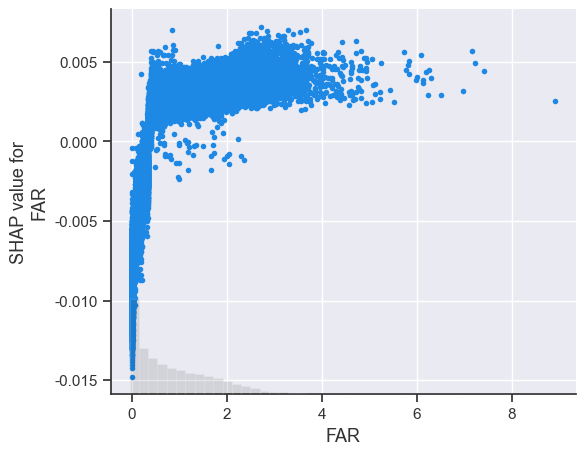

In [271]:
shap.plots.scatter(shap_values[:, "FAR"])

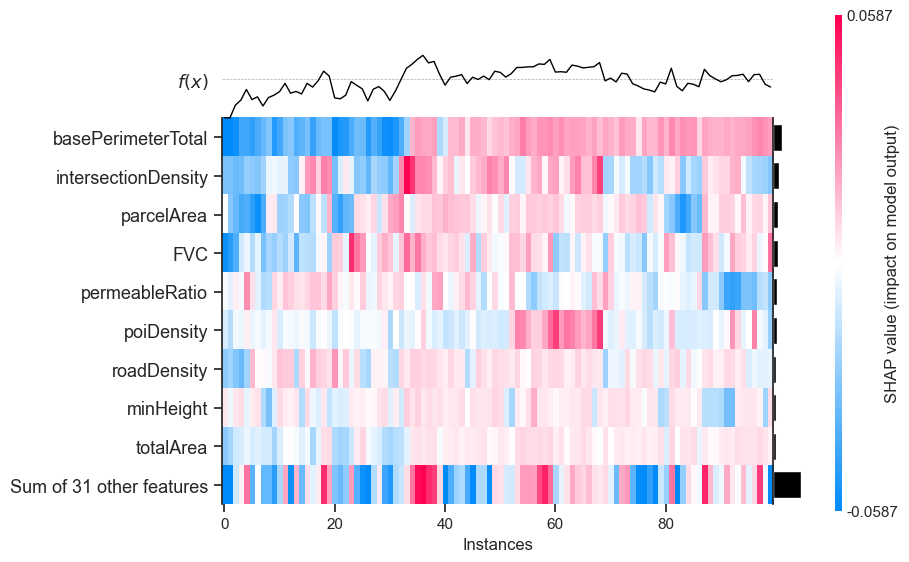

<Axes: xlabel='Instances'>

In [359]:
shap.plots.heatmap(shap_values[:100])

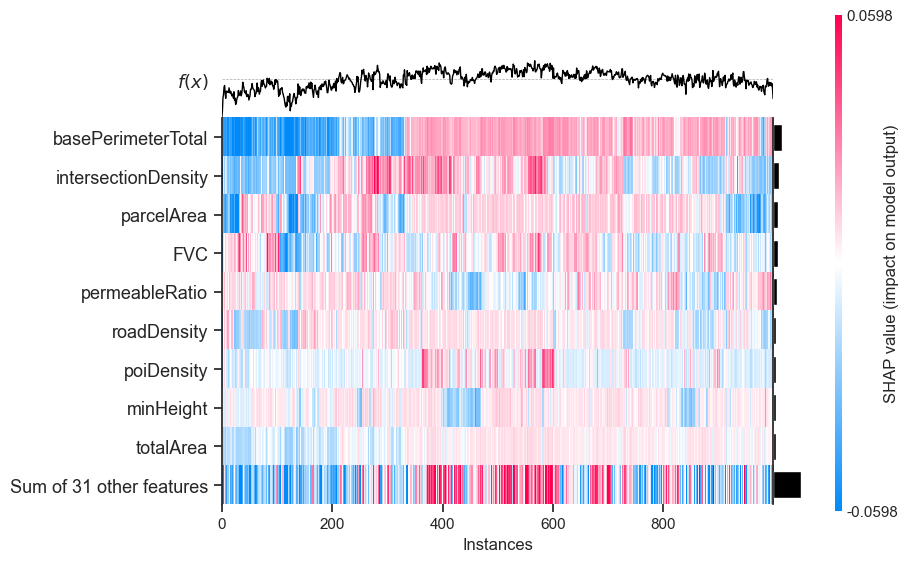

<Axes: xlabel='Instances'>

In [358]:
shap.plots.heatmap(shap_values[:1000])

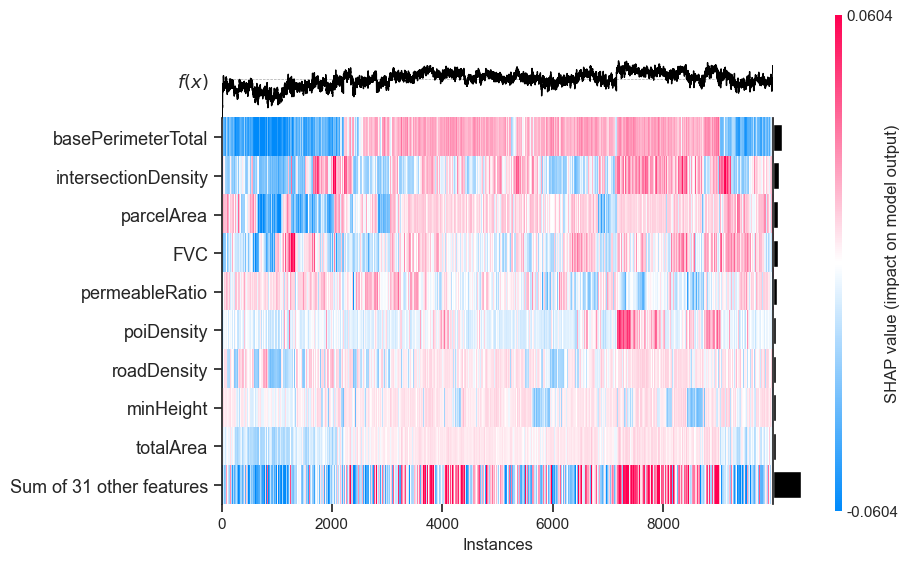

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values[:10000])

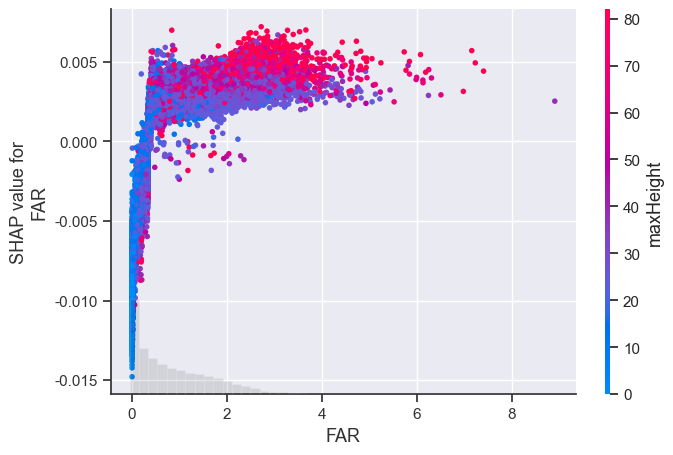

In [278]:
shap.plots.scatter(shap_values[:, "FAR"], color=shap_values)

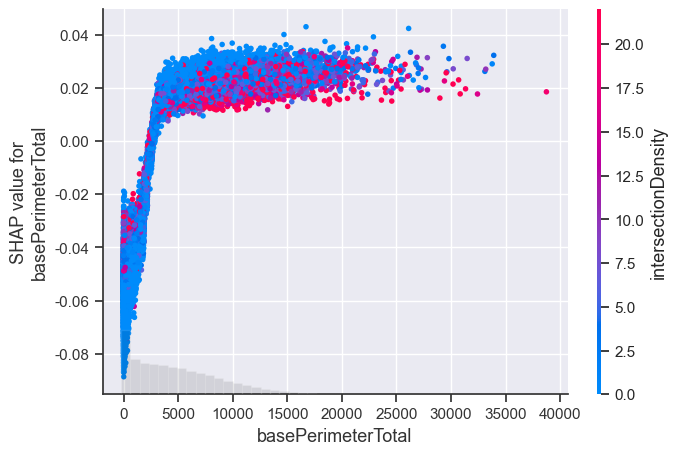

In [280]:
shap.plots.scatter(shap_values[:, "basePerimeterTotal"], color=shap_values)

In [305]:
len(features)

40

In [316]:
save_path = r"../output/interpret_models/SHAP_pdp2" 
os.makedirs(save_path, exist_ok=True)

for feature_name in features:
    print(feature_name)
    
    # 1. Create the figure with the desired size FIRST
    plt.figure(figsize=(10, 10))
    
    # 2. Generate the plot on the active figure (show=False is critical)
    shap.plots.scatter(shap_values[:, feature_name], color=shap_values, show=False)
    
    # 3. Save the figure
    filename = f"scatter_{feature_name}.png"
    full_path = os.path.join(save_path, filename)
    plt.savefig(full_path, bbox_inches='tight', dpi=300)
    
    # 4. Close it to free memory
    plt.close()

print(f"All plots saved to: {save_path}")

buildingCount
totalHeight
avgHeight
basePerimeterTotal
basePerimeterAvg
compactness
footprintAreaTotal
totalArea
avgBuildingArea
FAR
coverageRatio
roadDensity
intersectionDensity
poiDensity
poiDiversity
FVC
permeableRatio
maxHeight
minHeight
heightRange
heightIndex
heightDensity
heightOtherness
cornerCountTotal
basePerimeterMax
basePerimeterMin
shapeComplexity
areaVariance
parcelArea
largestPatchIndex
shape3DIndex
evennessIndex
cornerCountAvg
buildingProximity
buildingMinDist
buildingMaxDist
buildingDistAvg
buildingDistVar
SVF
streetRatio
All plots saved to: ../output/interpret_models/SHAP_pdp2


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

## SHAP value clustering

In [154]:
print(type(shap_values))
print(len(shap_values) if isinstance(shap_values, list) else shap_values.shape)

<class 'shap._explanation.Explanation'>
(38989, 40)


In [169]:
X_all = pd.concat([X_train, X_test]).sort_index()
shap_values_all = explainer(X_all)

In [170]:
# converting to DataFrame for easier handling
shap_df = pd.DataFrame(shap_values_all.values, columns=X_all.columns)
shap_df.head()

buildingCount  totalHeight  avgHeight  basePerimeterTotal  \
0           0.00         0.00       0.00                0.02   
1          -0.00        -0.00       0.00                0.02   
2          -0.00        -0.00       0.00                0.02   
3          -0.00        -0.00      -0.00               -0.05   
4          -0.00        -0.00      -0.00               -0.05   

   basePerimeterAvg  compactness  footprintAreaTotal  totalArea  \
0             -0.00         0.00               -0.00       0.00   
1             -0.00        -0.00                0.00      -0.01   
2             -0.00        -0.00                0.00      -0.00   
3              0.00        -0.00                0.00      -0.01   
4              0.00         0.00               -0.00      -0.02   

   avgBuildingArea   FAR  coverageRatio  roadDensity  intersectionDensity  \
0            -0.00  0.00          -0.00         0.01                -0.01   
1            -0.00 -0.00           0.00         0.01                -0.01   
2            -0.00 -0.00           0.00         0.00                -0.03   
3            -0.00 -0.01           0.00         0.01                -0.00   
4            -0.00 -0.01          -0.00         0.00                -0.00   

   poiDensity  poiDiversity   FVC  permeableRatio  maxHeight  minHeight  \
0       -0.01         -0.01 -0.01           -0.00      -0.01      -0.00   
1       -0.01         -0.01 -0.02            0.01      -0.01      -0.01   
2       -0.01         -0.01 -0.02            0.01      -0.01      -0.01   
3       -0.01         -0.01 -0.03            0.02      -0.01      -0.01   
4       -0.00         -0.00 -0.01            0.01      -0.00      -0.01   

   heightRange  heightIndex  heightDensity  heightOtherness  cornerCountTotal  \
0        -0.00         0.00           0.00            -0.01             -0.00   
1         0.00        -0.00          -0.00            -0.00             -0.00   
2        -0.00        -0.00           0.00            -0.01             -0.00   
3        -0.00         0.00           0.00            -0.00             -0.01   
4        -0.00         0.00          -0.00            -0.00             -0.01   

   basePerimeterMax  basePerimeterMin  shapeComplexity  areaVariance  \
0              0.00             -0.00            -0.00          0.00   
1             -0.00             -0.00            -0.00          0.00   
2             -0.00             -0.00            -0.00         -0.00   
3             -0.00             -0.00             0.00          0.00   
4             -0.00              0.00             0.00          0.00   

   parcelArea  largestPatchIndex  shape3DIndex  evennessIndex  cornerCountAvg  \
0       -0.00               0.00          0.00           0.00           -0.00   
1        0.01              -0.01         -0.00          -0.00           -0.01   
2       -0.00              -0.00         -0.00           0.00           -0.01   
3        0.02              -0.01         -0.00          -0.00           -0.01   
4       -0.06               0.01          0.00          -0.00           -0.00   

   buildingProximity  buildingMinDist  buildingMaxDist  buildingDistAvg  \
0               0.01            -0.00             0.00             0.00   
1              -0.00             0.00             0.00            -0.00   
2               0.00            -0.00             0.00             0.00   
3               0.00             0.00             0.00             0.00   
4              -0.01             0.00            -0.00             0.00   

   buildingDistVar   SVF  streetRatio  
0             0.00  0.01         0.01  
1            -0.00 -0.01         0.00  
2            -0.00 -0.01         0.01  
3             0.00 -0.02         0.00  
4            -0.00  0.01         0.01

In [171]:
shap_df.describe()

buildingCount  totalHeight  avgHeight  basePerimeterTotal  \
count      194941.00    194941.00  194941.00           194941.00   
mean            0.00        -0.00      -0.00               -0.00   
std             0.00         0.00       0.00                0.03   
min            -0.00        -0.01      -0.02               -0.10   
25%            -0.00        -0.00      -0.00               -0.03   
50%            -0.00        -0.00      -0.00                0.02   
75%             0.00         0.00       0.00                0.02   
max             0.01         0.03       0.02                0.04   

       basePerimeterAvg  compactness  footprintAreaTotal  totalArea  \
count         194941.00    194941.00           194941.00  194941.00   
mean              -0.00        -0.00                0.00       0.00   
std                0.00         0.00                0.00       0.01   
min               -0.02        -0.02               -0.01      -0.04   
25%               -0.00        -0.00               -0.00      -0.01   
50%               -0.00        -0.00                0.00       0.00   
75%                0.00         0.00                0.00       0.01   
max                0.02         0.02                0.01       0.02   

       avgBuildingArea       FAR  coverageRatio  roadDensity  \
count        194941.00 194941.00      194941.00    194941.00   
mean              0.00     -0.00           0.00         0.00   
std               0.00      0.00           0.00         0.01   
min              -0.01     -0.02          -0.00        -0.07   
25%              -0.00     -0.00          -0.00        -0.00   
50%               0.00      0.00           0.00         0.01   
75%               0.00      0.00           0.00         0.01   
max               0.01      0.01           0.00         0.03   

       intersectionDensity  poiDensity  poiDiversity       FVC  \
count            194941.00   194941.00     194941.00 194941.00   
mean                  0.00       -0.00         -0.00      0.00   
std                   0.02        0.01          0.01      0.02   
min                  -0.08       -0.06         -0.04     -0.10   
25%                  -0.02       -0.01         -0.01     -0.01   
50%                   0.00       -0.00         -0.00      0.00   
75%                   0.02        0.00          0.01      0.01   
max                   0.09        0.06          0.02      0.10   

       permeableRatio  maxHeight  minHeight  heightRange  heightIndex  \
count       194941.00  194941.00  194941.00    194941.00    194941.00   
mean             0.00       0.00       0.00        -0.00         0.00   
std              0.01       0.01       0.01         0.00         0.00   
min             -0.06      -0.02      -0.05        -0.01        -0.01   
25%             -0.01      -0.01      -0.00        -0.00        -0.00   
50%              0.00       0.00       0.00        -0.00        -0.00   
75%              0.01       0.00       0.01         0.00         0.00   
max              0.06       0.04       0.02         0.03         0.01   

       heightDensity  heightOtherness  cornerCountTotal  basePerimeterMax  \
count      194941.00        194941.00         194941.00         194941.00   
mean           -0.00            -0.00             -0.00             -0.00   
std             0.00             0.01              0.01              0.00   
min            -0.00            -0.02             -0.02             -0.02   
25%            -0.00            -0.00             -0.00             -0.00   
50%            -0.00            -0.00              0.00             -0.00   
75%             0.00             0.00              0.00              0.00   
max             0.01             0.03              0.02              0.02   

       basePerimeterMin  shapeComplexity  areaVariance  parcelArea  \
count         194941.00        194941.00     194941.00   194941.00   
mean              -0.00             0.00         -0.00        0.00   
std                0

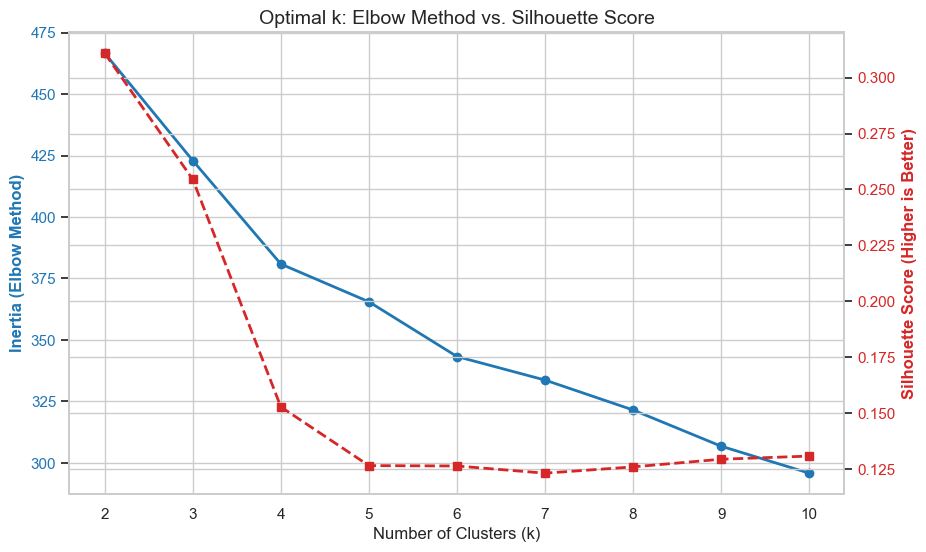

In [172]:
# Range of k to test
k_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(shap_df)
    
    # 1. Inertia (for Elbow Method)
    inertia.append(kmeans.inertia_)
    
    # 2. Silhouette Score
    score = silhouette_score(shap_df, labels)
    silhouette_scores.append(score)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Elbow (Inertia)
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Elbow Method)', color=color, fontweight='bold')
ax1.plot(k_range, inertia, 'o-', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Plot Silhouette (on secondary y-axis)
ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Silhouette Score (Higher is Better)', color=color, fontweight='bold')
ax2.plot(k_range, silhouette_scores, 's--', color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Optimal k: Elbow Method vs. Silhouette Score', fontsize=14)
plt.show()

In [180]:
inertia_df = pd.DataFrame(inertia)
inertia_df.to_csv(r"../output/interpret_models/SHAP_value_clustering/kmeans_all_inertia.csv")

In [183]:
silhouette_scores_df = pd.DataFrame(silhouette_scores)
silhouette_scores_df.to_csv(r"../output/interpret_models/SHAP_value_clustering/kmeans_all_silhouette.csv")

In [298]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(shap_df)

# Attach cluster labels back to original data and SHAP data
X_analysis = X_all.copy()
X_analysis['Cluster'] = clusters
shap_df['Cluster'] = clusters

In [299]:
shap_df.head()

buildingCount  totalHeight  avgHeight  basePerimeterTotal  \
0           0.00         0.00       0.00                0.02   
1          -0.00        -0.00       0.00                0.02   
2          -0.00        -0.00       0.00                0.02   
3          -0.00        -0.00      -0.00               -0.05   
4          -0.00        -0.00      -0.00               -0.05   

   basePerimeterAvg  compactness  footprintAreaTotal  totalArea  \
0             -0.00         0.00               -0.00       0.00   
1             -0.00        -0.00                0.00      -0.01   
2             -0.00        -0.00                0.00      -0.00   
3              0.00        -0.00                0.00      -0.01   
4              0.00         0.00               -0.00      -0.02   

   avgBuildingArea   FAR  coverageRatio  roadDensity  intersectionDensity  \
0            -0.00  0.00          -0.00         0.01                -0.01   
1            -0.00 -0.00           0.00         0.01                -0.01   
2            -0.00 -0.00           0.00         0.00                -0.03   
3            -0.00 -0.01           0.00         0.01                -0.00   
4            -0.00 -0.01          -0.00         0.00                -0.00   

   poiDensity  poiDiversity   FVC  permeableRatio  maxHeight  minHeight  \
0       -0.01         -0.01 -0.01           -0.00      -0.01      -0.00   
1       -0.01         -0.01 -0.02            0.01      -0.01      -0.01   
2       -0.01         -0.01 -0.02            0.01      -0.01      -0.01   
3       -0.01         -0.01 -0.03            0.02      -0.01      -0.01   
4       -0.00         -0.00 -0.01            0.01      -0.00      -0.01   

   heightRange  heightIndex  heightDensity  heightOtherness  cornerCountTotal  \
0        -0.00         0.00           0.00            -0.01             -0.00   
1         0.00        -0.00          -0.00            -0.00             -0.00   
2        -0.00        -0.00           0.00            -0.01             -0.00   
3        -0.00         0.00           0.00            -0.00             -0.01   
4        -0.00         0.00          -0.00            -0.00             -0.01   

   basePerimeterMax  basePerimeterMin  shapeComplexity  areaVariance  \
0              0.00             -0.00            -0.00          0.00   
1             -0.00             -0.00            -0.00          0.00   
2             -0.00             -0.00            -0.00         -0.00   
3             -0.00             -0.00             0.00          0.00   
4             -0.00              0.00             0.00          0.00   

   parcelArea  largestPatchIndex  shape3DIndex  evennessIndex  cornerCountAvg  \
0       -0.00               0.00          0.00           0.00           -0.00   
1        0.01              -0.01         -0.00          -0.00           -0.01   
2       -0.00              -0.00         -0.00           0.00           -0.01   
3        0.02              -0.01         -0.00          -0.00           -0.01   
4       -0.06               0.01          0.00          -0.00           -0.00   

   buildingProximity  buildingMinDist  buildingMaxDist  buildingDistAvg  \
0               0.01            -0.00             0.00             0.00   
1              -0.00             0.00             0.00            -0.00   
2               0.00            -0.00             0.00             0.00   
3               0.00             0.00             0.00             0.00   
4              -0.01             0.00            -0.00             0.00   

   buildingDistVar   SVF  streetRatio  Cluster  
0             0.00  0.01         0.01        2  
1            -0.00 -0.01         0.00        2  
2            -0.00 -0.01         0.01        2  
3             0.00 -0.02         0.00        1  
4            -0.00  0.01         0.01        1

In [300]:
grid500['SHAP_Cluster'] = -1 
grid500.loc[X_all.index, 'SHAP_Cluster'] = clusters
grid500_clustered = grid500[grid500['SHAP_Cluster'] != -1].copy()

print(f"Mapped {len(grid500_clustered)} blocks to clusters.")

Mapped 194941 blocks to clusters.


In [301]:
grid500_clustered.describe()

Global_ID   NTL2023  NTL2023_focal  VIT202311  UHIDAY2020_07_inv  \
count  194941.00 189742.00      194941.00  194941.00          194941.00   
mean    98137.51     28.88          28.65    1414.14               0.37   
std     56862.94     19.36          17.87    1821.23               0.10   
min         0.00      0.00           0.00       0.00               0.00   
25%     49033.00     15.06          15.64     206.86               0.30   
50%     97800.00     25.85          26.01     731.14               0.38   
75%    147135.00     38.67          38.17    2003.43               0.47   
max    196769.00    465.96         348.37   68494.71               1.00   

       buildingCount  totalHeight  avgHeight  maxHeight  minHeight  \
count      194941.00    194941.00  194941.00  194941.00  194941.00   
mean           46.70       893.91      16.53      30.42       9.58   
std            50.96      1035.48       8.72      24.26       4.91   
min             0.00         0.00       0.00       0.00       0.00   
25%            12.00       144.00      12.00      12.00       6.00   
50%            35.00       559.00      16.67      27.00      12.00   
75%            65.00      1315.00      21.99      40.00      12.00   
max          1189.00     22354.50     130.50     535.00     112.00   

       heightRange  heightIndex  heightDensity  heightOtherness  \
count    194941.00    194941.00      194941.00        194941.00   
mean         20.83         0.10           0.00             0.30   
std          23.99         0.17           0.00             0.28   
min           0.00         0.00           0.00             0.00   
25%           0.00         0.02           0.00             0.00   
50%          15.00         0.04           0.00             0.28   
75%          28.00         0.09           0.01             0.43   
max         532.00         1.00           0.09             2.87   

       cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
count         194941.00           194941.00         194941.00   
mean             315.42             4959.32            112.06   
std              352.35             4245.40             60.43   
min                0.00                0.00              0.00   
25%               72.00             1417.38             83.02   
50%              222.00             4200.02            110.75   
75%              445.00             7512.92            137.30   
max             8619.00            50912.47           1689.25   

       basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
count         194941.00         194941.00        194941.00    194941.00   
mean             347.82             22.65             4.55         0.54   
std              230.34             35.73             1.40         0.17   
min                0.00              0.00             0.00         0.00   
25%              202.45              4.35             4.57         0.53   
50%              319.04             14.07             4.82         0.57   
75%              461.66             28.38             5.08         0.62   
max             5146.21           1689.25            39.49         0.99   

       footprintAreaTotal  totalArea    areaVariance  avgBuildingArea  \
count           194941.00  194941.00       194941.00        194941.00   
mean             33192.68  216494.27    191423545.70          5437.01   
std              27474.13  210010.02   2300870309.71          7776.02   
min                  0.00       0.00            0.00             0.00   
25%               8888.17   37241.51      3519241.57          1875.57   
50%              29057.71  157756.72     20726892.83          4027.77   
75%              51784.69  347326.83     74777609.98          6726.97   
max             226640.62 3672930.95 662000000000.00        664544.83   

       parcelArea  largestPatchIndex  shape3DIndex       SVF  evennessIndex  \
count   194941.00          194941.00     194941.00 194941.00      194941.00   
mean    180006.93 

In [302]:
grid500_clustered.groupby("SHAP_Cluster").count()

Global_ID   City  NTL2023  NTL2023_focal  VIT202311  \
SHAP_Cluster                                                        
0                 57133  57133    56362          57133      57133   
1                 61911  61911    58481          61911      61911   
2                 37251  37251    36909          37251      37251   
3                 38646  38646    37990          38646      38646   

              UHIDAY2020_07_inv  buildingCount  totalHeight  avgHeight  \
SHAP_Cluster                                                             
0                         57133          57133        57133      57133   
1                         61911          61911        61911      61911   
2                         37251          37251        37251      37251   
3                         38646          38646        38646      38646   

              maxHeight  minHeight  heightRange  heightIndex  heightDensity  \
SHAP_Cluster                                                                  
0                 57133      57133        57133        57133          57133   
1                 61911      61911        61911        61911          61911   
2                 37251      37251        37251        37251          37251   
3                 38646      38646        38646        38646          38646   

              heightOtherness  cornerCountTotal  basePerimeterTotal  \
SHAP_Cluster                                                          
0                       57133             57133               57133   
1                       61911             61911               61911   
2                       37251             37251               37251   
3                       38646             38646               38646   

              basePerimeterAvg  basePerimeterMax  basePerimeterMin  \
SHAP_Cluster                                                         
0                        57133             57133             57133   
1                        61911             61911             61911   
2                        37251             37251             37251   
3                        38646             38646             38646   

              shapeComplexity  compactness  footprintAreaTotal  totalArea  \
SHAP_Cluster                                                                
0                       57133        57133               57133      57133   
1                       61911        61911               61911      61911   
2                       37251        37251               37251      37251   
3                       38646        38646               38646      38646   

              areaVariance  avgBuildingArea  parcelArea  largestPatchIndex  \
SHAP_Cluster                                                                 
0                    57133            57133       57133              57133   
1                    61911            61911       61911              61911   
2                    37251            37251       37251              37251   
3                    38646            38646       38646              38646   

              shape3DIndex    SVF  evennessIndex    FAR  coverageRatio    FVC  \
SHAP_Cluster                                                                    
0                    57133  57133          57133  57133          57133  57133   
1                    61911  61911          61911  61911          61911  61911   
2                    37251  37251          37251  37251          37251  37251   
3                    38646  38646          38646  38646          38646  38646   

              permeableRatio  poiDensity  poiDiversity  streetRatio  \
SHAP_Cluster                                                          
0                      57133       57133         57133        57133   
1                      61911       61911         61911        61911   
2                      37251       37251         37251        37251   
3                      38646       38646         38646   

In [303]:
# Create a single list of all columns you want to select
cols_to_use = ['SHAP_Cluster'] + features

# Select those columns, then group and mean
mean_values = grid500_clustered[cols_to_use].groupby('SHAP_Cluster').mean()

# Display the result
mean_values
# mean_values.to_csv(r"../output/interpret_models/SHAP_value_clustering/k5_mean_values.csv")

buildingCount  totalHeight  avgHeight  basePerimeterTotal  \
SHAP_Cluster                                                              
0                     74.04      1487.61      20.59             7892.91   
1                      7.25       105.05      10.91              734.71   
2                     49.35       817.37      16.10             4844.06   
3                     66.91      1353.72      19.94             7501.33   

              basePerimeterAvg  compactness  footprintAreaTotal  totalArea  \
SHAP_Cluster                                                                 
0                       121.03         0.57            48963.74  350317.46   
1                        88.11         0.45             5485.29   26858.86   
2                       121.23         0.60            34796.55  185188.60   
3                       128.32         0.57            52718.60  352626.49   

              avgBuildingArea  FAR  coverageRatio  roadDensity  \
SHAP_Cluster                                                     
0                     6111.57 1.40           0.20         8.85   
1                     3713.42 0.11           0.02         2.69   
2                     5731.32 0.74           0.14         2.95   
3                     6917.28 1.41           0.21         2.96   

              intersectionDensity  poiDensity  poiDiversity  FVC  \
SHAP_Cluster                                                       
0                           13.70      427.72          1.60 0.57   
1                            2.91       48.42          0.58 0.64   
2                            2.13       58.46          0.80 0.74   
3                            1.23      218.80          1.36 0.54   

              permeableRatio  maxHeight  minHeight  heightRange  heightIndex  \
SHAP_Cluster                                                                   
0                       0.81      46.11       9.31        36.81         0.04   
1                       0.94      14.55       8.70         5.85         0.21   
2                       0.92      25.76      10.27        15.49         0.05   
3                       0.84      37.11      10.73        26.37         0.04   

              heightDensity  heightOtherness  cornerCountTotal  \
SHAP_Cluster                                                     
0                      0.01             0.45            539.02   
1                      0.00             0.13             43.54   
2                      0.00             0.29            297.00   
3                      0.01             0.36            438.15   

              basePerimeterMax  basePerimeterMin  shapeComplexity  \
SHAP_Cluster                                                        
0                       450.45             13.69             5.00   
1                       174.12             37.12             3.71   
2                       370.45             19.40             4.82   
3                       452.55             15.86             4.96   

              areaVariance  parcelArea  largestPatchIndex  shape3DIndex  \
SHAP_Cluster                                                              
0             180163569.89   212295.93               0.46        485.46   
1             108716583.20   130557.96               0.43         26.63   
2             256253220.51   158316.00               0.49        133.40   
3             278077189.96   232397.27               0.68         45.69   

              evennessIndex  cornerCountAvg  buildingProximity  \
SHAP_Cluster                                                     
0                    374.66            7.53              35.12   
1                     59.89            4.63              47.44   
2                    249.54            6.15              37.91   
3                    396.79            6.60              37.49   

              buildingMinDist  buildingMaxDist  buildingDistAvg  \
SHAP_Cluster                                                      
0            

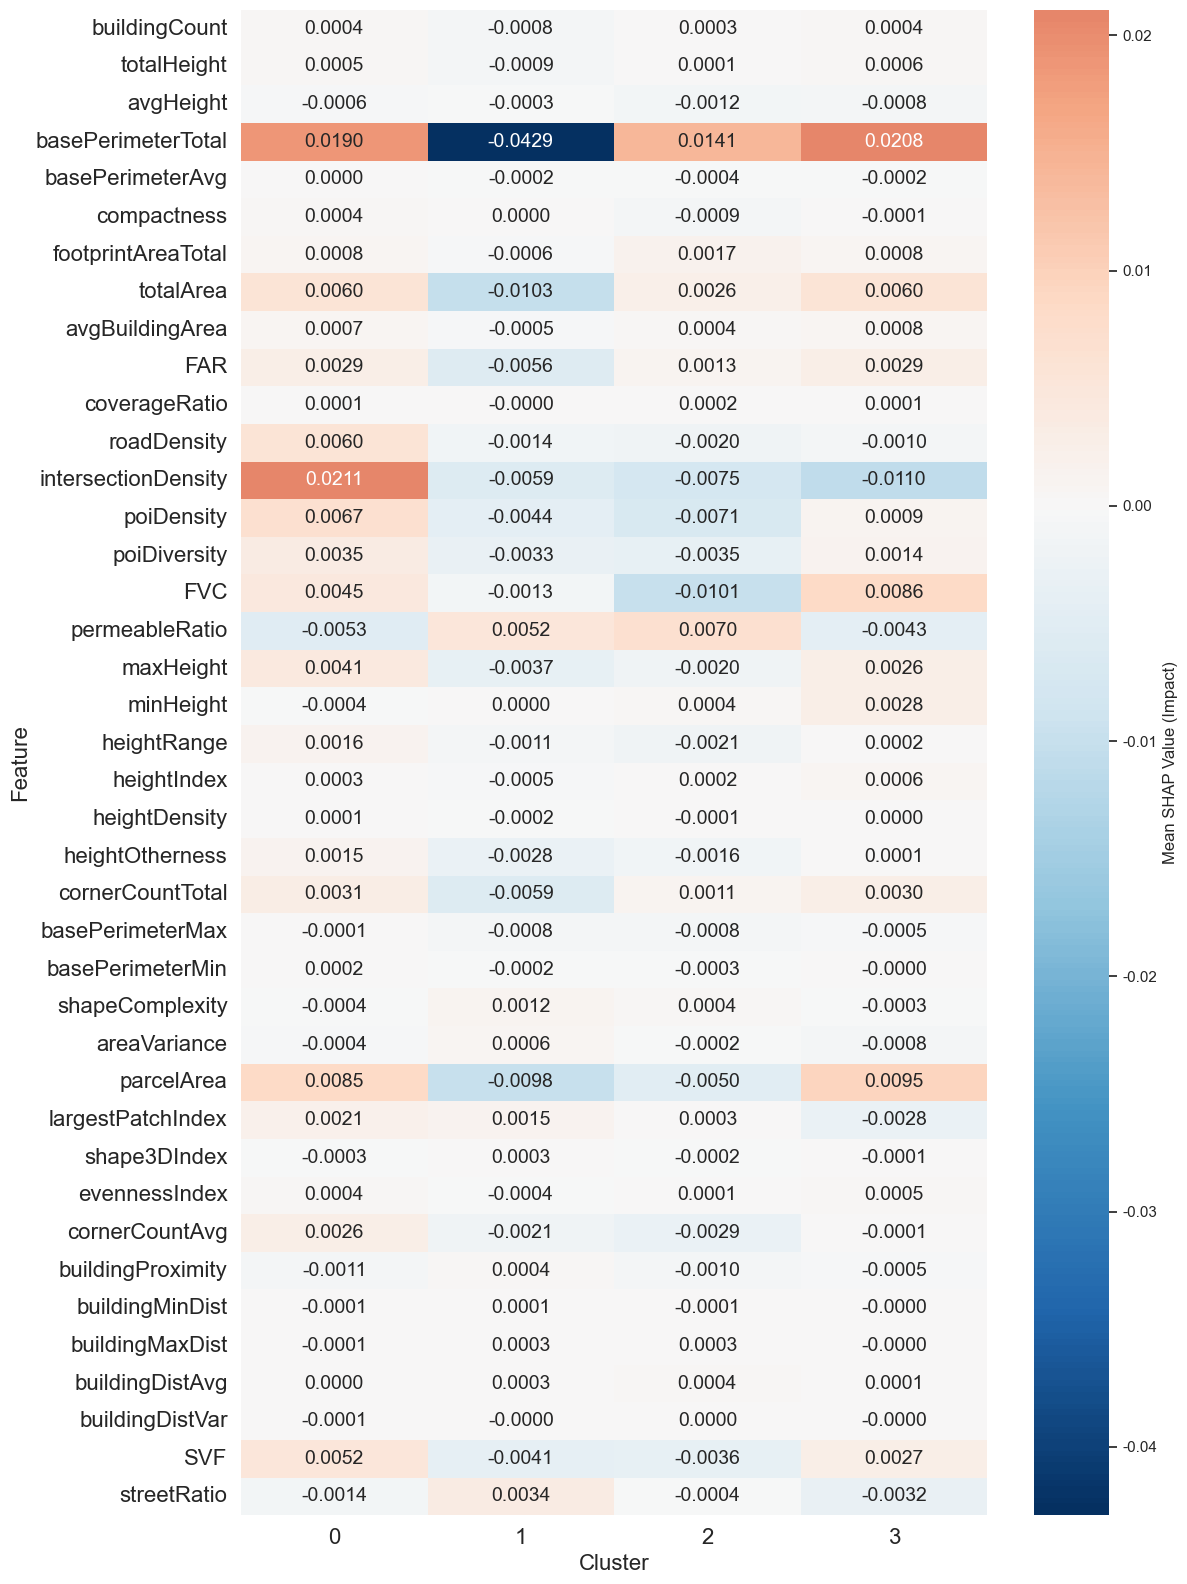

In [ ]:
# 1. Ensure you are using the FULL dataframe (no .head() or slicing)
# Recalculate the means for the full dataset
cluster_groups = shap_df.groupby('Cluster').mean().T # Transpose: Features as Rows

# 2. Dynamic Figure Height
# A good rule of thumb is 0.4 inches per feature
num_features = cluster_groups.shape[0] 
fig_height = max(6, num_features * 0.4) 

plt.figure(figsize=(12, fig_height)) # <--- This ensures enough vertical space


# 3. Plot with specific y-tick parameters
sns.heatmap(
    cluster_groups, 
    cmap="RdBu_r", 
    center=0,
    annot=True,
    fmt=".4f",       # Show 3 decimal places to see tiny non-zero values
    cbar_kws={'label': 'Mean SHAP Value (Impact)'},
    annot_kws={"size": 14},
    # ax=ax,
    # cbar_ax=cax
)

# plt.title("Urban Performance Typologies: Mean SHAP Values per Cluster", fontsize=15)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Feature", fontsize=16)

# Force matplotlib to show every single label
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# cax.tick_params(labelsize=14) 
# cax.set_ylabel('Mean SHAP Value (Impact)', fontsize=14)

plt.tight_layout()
plt.show()

In [259]:
gdb_path = r"D:\008RA\gis_process\CN_City36\CN_City36_t1.gdb"
layer_name = "全国网格"

gdf = gpd.read_file(gdb_path, layer=layer_name)

gdf_joined = gdf.merge(grid500_clustered, on="Global_ID", how="left")

output_gdb = r"D:\008RA\gis_process\CN_City36\CN_City36_t2.gdb"
output_layer = "全国网格_绩效t7_SHAP_cluster_k4"

pyogrio.write_dataframe(
    gdf_joined,
    output_gdb,
    layer=output_layer,
    driver="OpenFileGDB"
)

### Clusters feature

In [363]:
layer_name = "全国网格_绩效t7_SHAP_cluster_k4"
shap_gdf = gpd.read_file(output_gdb, layer=layer_name)
shap_gdf.head()

Global_ID   City_x  FID_1  Shape_Length  Shape_Area   City_y  NTL2023  \
0       0.00  Beijing   0.00       2000.00   250000.00  Beijing     6.18   
1       1.00  Beijing   1.00       2000.00   250000.00  Beijing     5.74   
2       2.00  Beijing   2.00       2000.00   250000.00  Beijing    11.32   
3       3.00  Beijing   3.00       2000.00   250000.00  Beijing    11.73   
4       4.00  Beijing   4.00       2000.00   250000.00  Beijing     8.45   

   NTL2023_focal  VIT202311  UHIDAY2020_07_inv  buildingCount  totalHeight  \
0           7.03    1649.86               0.47          31.00        93.00   
1           7.23     155.86               0.47          29.00        87.00   
2          13.62      57.14               0.47          22.00        66.00   
3          14.36     243.57               0.47           8.00        24.00   
4           9.19       0.00               0.47           0.00         0.00   

   avgHeight  maxHeight  minHeight  heightRange  heightIndex  heightDensity  \
0       3.00       3.00       3.00         0.00         0.03           0.00   
1       3.00       3.00       3.00         0.00         0.03           0.00   
2       3.00       3.00       3.00         0.00         0.05           0.00   
3       3.00       3.00       3.00         0.00         0.12           0.00   
4       0.00       0.00       0.00         0.00         0.00           0.00   

   heightOtherness  cornerCountTotal  basePerimeterTotal  basePerimeterAvg  \
0             0.00            180.00             6500.98            209.71   
1             0.00            149.00             3810.39            131.39   
2             0.00            117.00             3645.40            165.70   
3             0.00             42.00             1147.60            143.45   
4             0.00              0.00                0.00              0.00   

   basePerimeterMax  basePerimeterMin  shapeComplexity  compactness  \
0            831.63             32.55             5.07         0.56   
1            272.14             15.33             5.17         0.62   
2            668.26             28.73             4.92         0.56   
3            283.01             75.66             5.70         0.60   
4              0.00              0.00             0.00         0.00   

   footprintAreaTotal  totalArea  areaVariance  avgBuildingArea  parcelArea  \
0            88704.58   88704.58   50961857.70          2861.44   132998.25   
1            33119.49   33119.49    1261729.88          1142.05   196625.22   
2            51092.86   51092.86   30358745.83          2322.40   132197.31   
3             8534.61    8534.61     958399.89          1066.83   205685.37   
4                0.00       0.00          0.00             0.00       99.15   

   largestPatchIndex  shape3DIndex  SVF  evennessIndex  FAR  coverageRatio  \
0               0.47          0.01 0.80         234.60 0.35           0.35   
1               0.67          0.26 0.89          35.66 0.13           0.13   
2               0.53          0.01 0.90         151.50 0.20           0.20   
3               0.82          0.02 0.95          15.54 0.03           0.03   
4               0.00          0.00 0.98           0.00 0.00           0.00   

   FVC  permeableRatio  poiDensity  poiDiversity  streetRatio  roadDensity  \
0 0.84            0.89        4.00          0.00         0.20         5.00   
1 0.86            0.94       12.00          0.64         0.20         7.00   
2 0.88            0.93        0.00          0.00         0.20         1.00   
3 0.93            0.98        0.00          0.00         0.20         3.00   
4 0.82            0.98       16.00          0.69         0.00         1.00   

   intersectionDensity  cornerCountAvg  buildingProximity  buildingMinDist  \
0                 1.00            5.81              52.56            14.99   
1                 1.00            5.14              34.22             6.82   
2                 0.00            5.32              47.90  

In [364]:
cluster_features = shap_gdf.groupby('SHAP_Cluster').mean(numeric_only=True)

In [365]:
cluster_features

Global_ID   FID_1  Shape_Length  Shape_Area  NTL2023  \
SHAP_Cluster                                                         
0.00           92175.87 4025.29       2000.00   250000.00    40.03   
1.00           89274.20 4087.46       2000.00   250000.00    19.74   
2.00          104726.45 3763.76       2000.00   250000.00    25.60   
3.00          104948.07 3548.83       2000.00   250000.00    26.31   

              NTL2023_focal  VIT202311  UHIDAY2020_07_inv  buildingCount  \
SHAP_Cluster                                                               
0.00                  39.08    2872.21               0.34          74.04   
1.00                  19.67     718.17               0.39          49.35   
2.00                  25.83    1099.67               0.37          43.06   
3.00                  26.41     404.37               0.41           8.10   

              totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
SHAP_Cluster                                                              
0.00              1487.61      20.59      46.11       9.31        36.81   
1.00               817.37      16.10      25.76      10.27        15.49   
2.00               855.90      15.74      27.10       9.54        17.55   
3.00               120.33      12.05      16.57       9.38         7.19   

              heightIndex  heightDensity  heightOtherness  cornerCountTotal  \
SHAP_Cluster                                                                  
0.00                 0.04           0.01             0.45            539.02   
1.00                 0.05           0.00             0.29            297.00   
2.00                 0.11           0.00             0.25            280.00   
3.00                 0.20           0.00             0.16             49.78   

              basePerimeterTotal  basePerimeterAvg  basePerimeterMax  \
SHAP_Cluster                                                           
0.00                     7892.91            121.03            450.45   
1.00                     4844.06            121.23            370.45   
2.00                     4767.90            104.39            323.70   
3.00                      878.73            102.14            208.12   

              basePerimeterMin  shapeComplexity  compactness  \
SHAP_Cluster                                                   
0.00                     13.69             5.00         0.57   
1.00                     19.40             4.82         0.60   
2.00                     22.36             4.29         0.51   
3.00                     40.24             4.02         0.48   

              footprintAreaTotal  totalArea  areaVariance  avgBuildingArea  \
SHAP_Cluster                                                                 
0.00                    48963.74  350317.46  180163569.89          6111.57   
1.00                    34796.55  185188.60  256253220.51          5731.32   
2.00                    33342.49  220378.21  184418653.17          5076.10   
3.00                     6997.86   34910.12  155606411.90          4719.45   

              parcelArea  largestPatchIndex  shape3DIndex  SVF  evennessIndex  \
SHAP_Cluster                                                                    
0.00           212295.93               0.46        485.46 0.78         374.66   
1.00           158316.00               0.49        133.40 0.89         249.54   
2.00           161160.14               0.49         29.66 0.87         253.19   
3.00           184334.35               0.58         41.32 0.94          79.93   

              FAR  coverageRatio  FVC  permeableRatio  poiDensity  \
SHAP_Cluster                                                        
0.00         1.40           0.20 0.57            0.81      427.72   
1.00         0.74           0.14 0.74            0.92       58.46   
2.00         0.88           0.13 0.60            0.89      145.62   
3.00         0.14           0.03 0.61            0.93       59.52   

              poiDive

In [ ]:
plot_df = cluster_features.reset_index()

if 'SHAP_Cluster' not in plot_df.columns:
    plot_df = plot_df.rename(columns={'index': 'SHAP_Cluster'})

features = [
    'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
    'basePerimeterAvg', 'compactness', 'footprintAreaTotal', 'totalArea',
    'avgBuildingArea', 'FAR', 'coverageRatio',
    'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
    'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
    'heightDensity', 'heightOtherness', 'cornerCountTotal', 'basePerimeterMax',
    'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
    'largestPatchIndex', 'shape3DIndex', 'evennessIndex', 'cornerCountAvg',
    'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
    'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
]

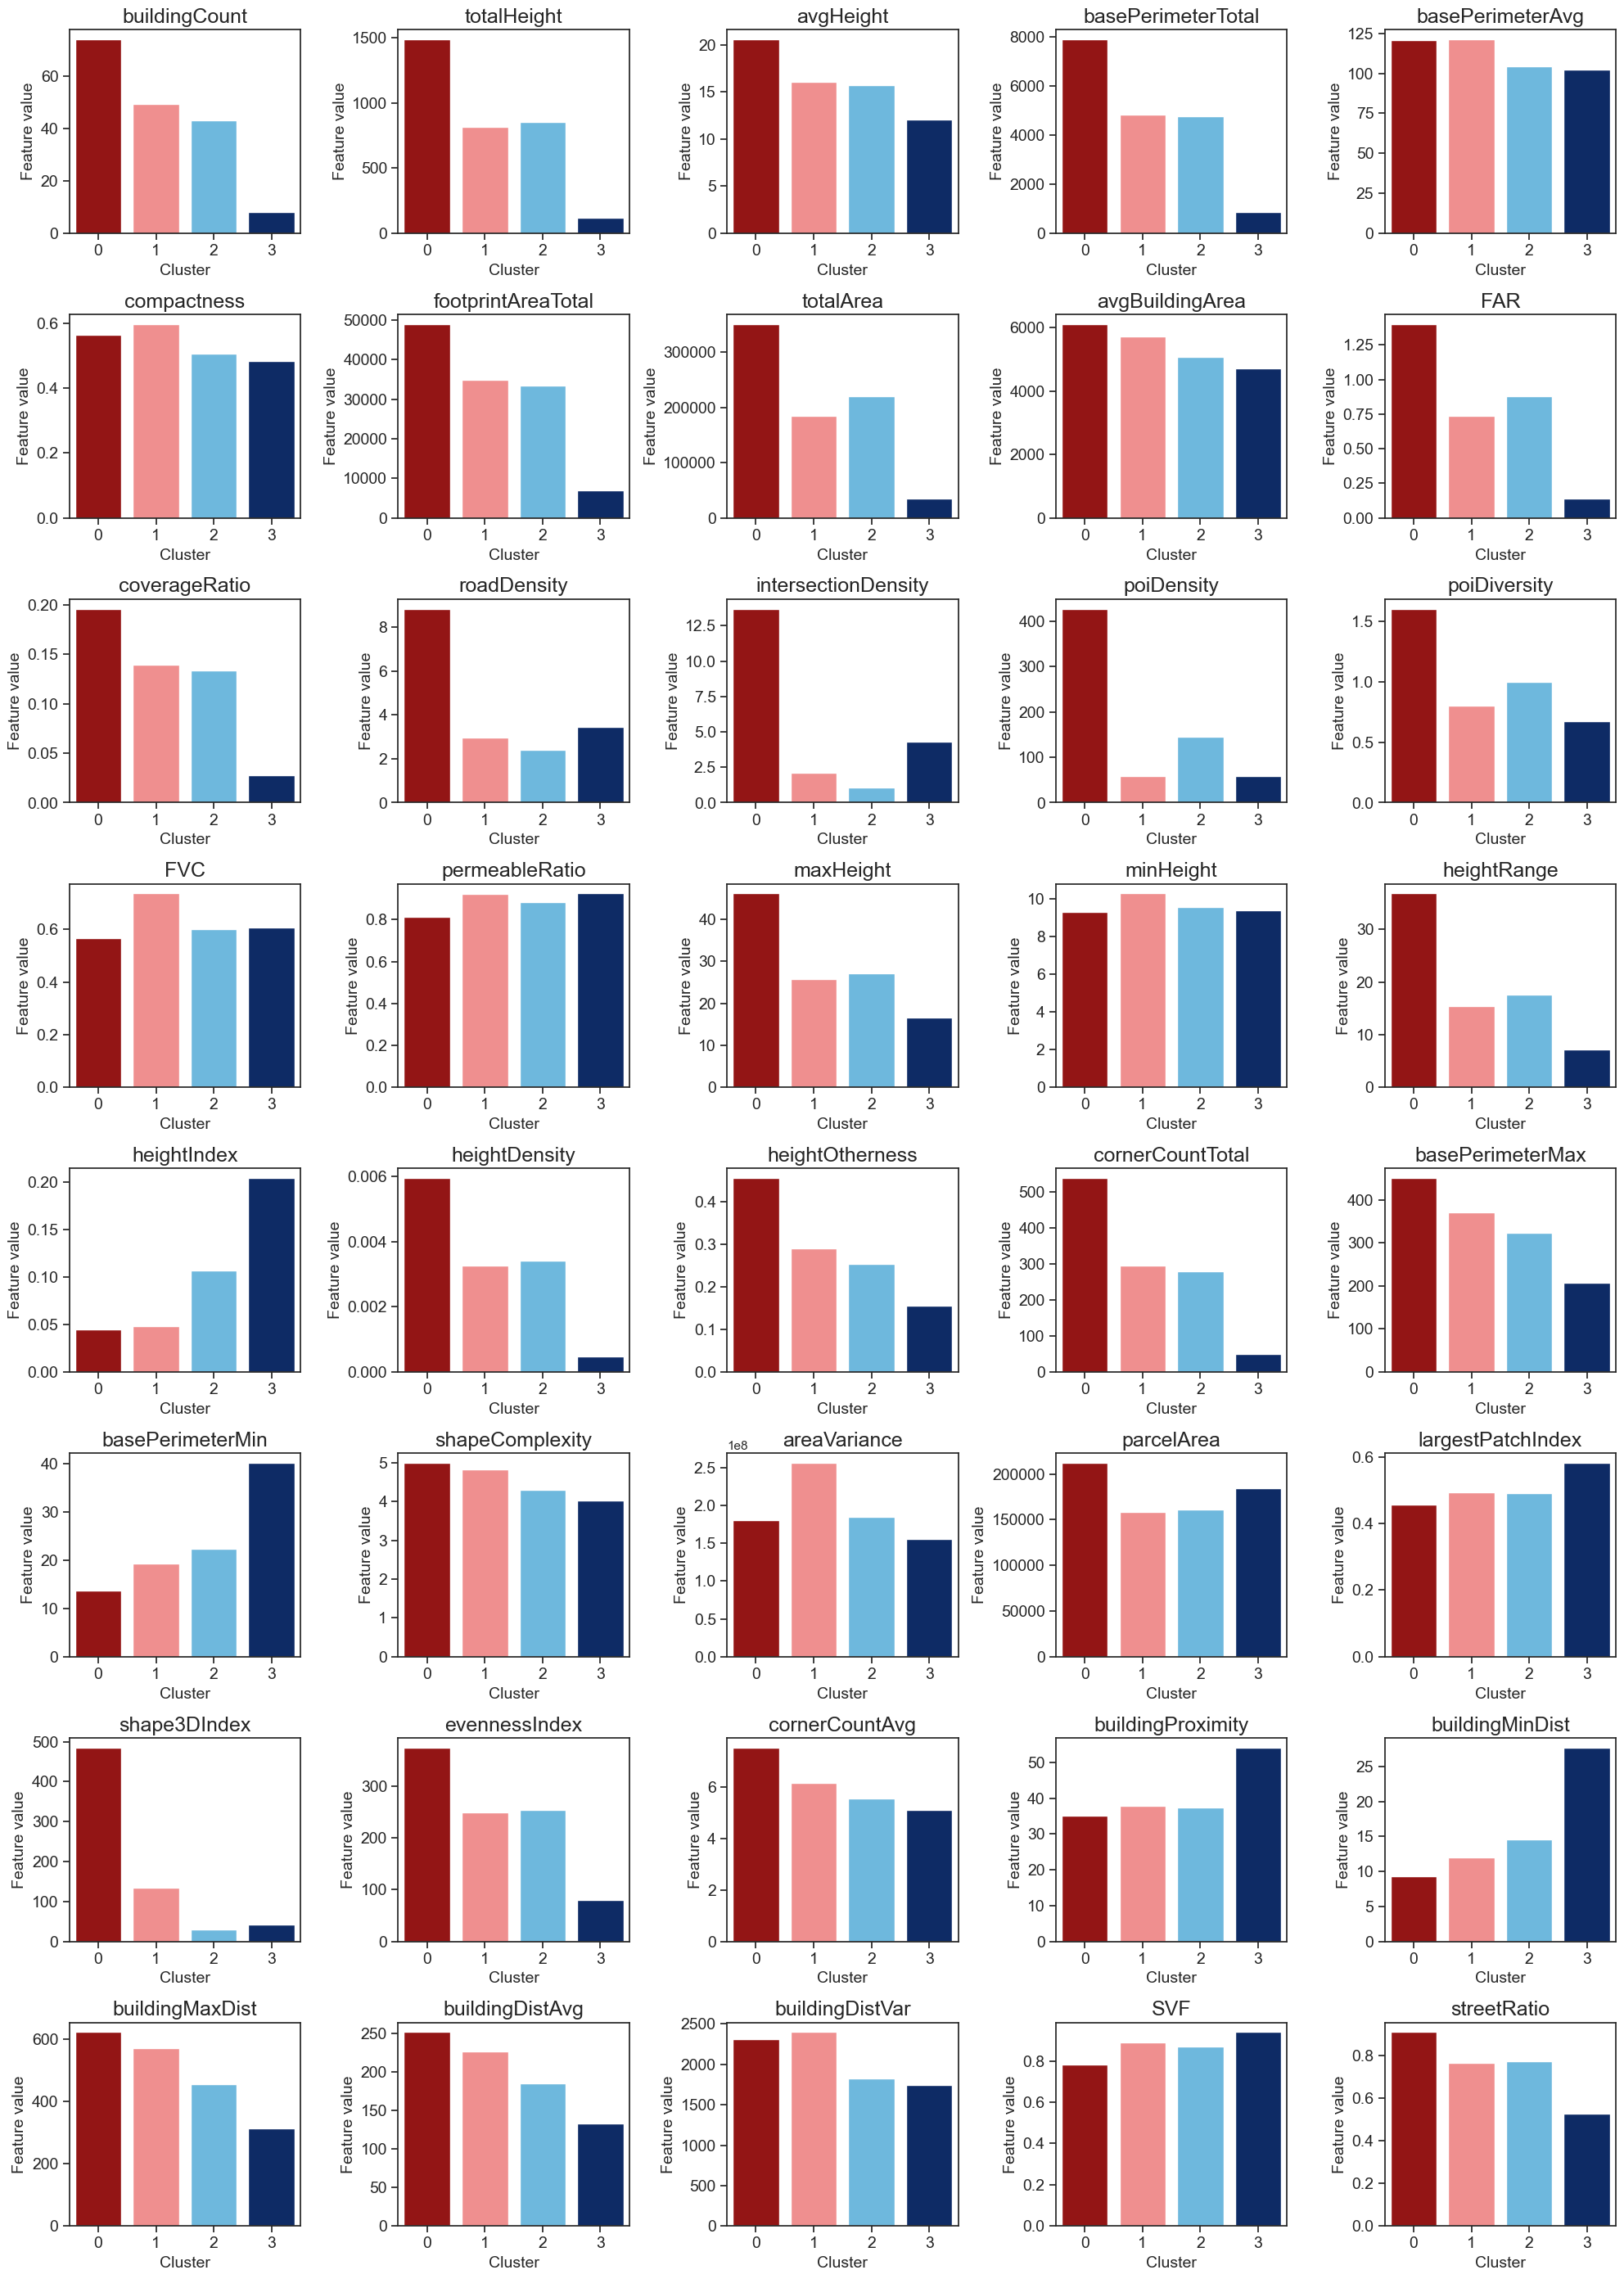

In [ ]:
plot_df['SHAP_Cluster'] = plot_df['SHAP_Cluster'].astype(int)
cluster_colors = {
    "0": "#A80000",
    "1": "#FF7F7F",
    "2": "#5BBEF0",
    "3": "#002673"
}

cols = 5
rows = 8 
fig, axes = plt.subplots(rows, cols, figsize=(20, 3.5 * rows))
axes = axes.flatten()

for i, feature_name in enumerate(features):
    ax = axes[i]
    
    if feature_name in plot_df.columns:
        sns.barplot(
            data=plot_df, 
            x='SHAP_Cluster', 
            y=feature_name, 
            ax=ax,
            palette=cluster_colors,
            errorbar='sd', 
            capsize=0.1
        )
        
        ax.set_title(feature_name, fontsize=18)
        ax.set_xlabel('Cluster', fontsize=14) 
        ax.set_ylabel('Feature value', fontsize=14)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        
    #     if i < (rows - 1) * cols:
    #         ax.set_xticklabels([])
    # else:
    #     ax.axis('off')

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# plt.suptitle("Mean Urban Form Characteristics by Cluster", fontsize=22, y=1.005)
plt.tight_layout()
plt.show()

# Case study: Hangzhou

In [390]:
hz = shap_gdf[shap_gdf['City_x'] == "Hangzhou"]
hz.shape

(7565, 58)

In [391]:
shap_cluster_hz = hz.groupby('SHAP_Cluster').mean(numeric_only=True)
shap_cluster_hz

Global_ID   FID_1  Shape_Length  Shape_Area  NTL2023  \
SHAP_Cluster                                                         
0.00           63760.76 4049.76       2000.00   250000.00    41.11   
1.00           63052.03 3341.03       2000.00   250000.00    18.93   
2.00           63269.14 3558.14       2000.00   250000.00    25.54   
3.00           64051.84 4340.84       2000.00   250000.00    30.06   

              NTL2023_focal  VIT202311  UHIDAY2020_07_inv  buildingCount  \
SHAP_Cluster                                                               
0.00                  40.09    2437.09               0.31          64.71   
1.00                  18.81     726.62               0.39          58.02   
2.00                  25.29     949.96               0.37          38.94   
3.00                  30.19     426.08               0.39          11.11   

              totalHeight  avgHeight  maxHeight  minHeight  heightRange  \
SHAP_Cluster                                                              
0.00              1481.06      22.65      45.80      11.26        34.53   
1.00              1063.92      17.60      26.13      11.87        14.26   
2.00               785.63      16.61      26.48      11.08        15.40   
3.00               181.40      14.89      22.09      11.39        10.70   

              heightIndex  heightDensity  heightOtherness  cornerCountTotal  \
SHAP_Cluster                                                                  
0.00                 0.04           0.01             0.39            467.77   
1.00                 0.04           0.00             0.23            328.86   
2.00                 0.12           0.00             0.23            245.99   
3.00                 0.18           0.00             0.19             69.13   

              basePerimeterTotal  basePerimeterAvg  basePerimeterMax  \
SHAP_Cluster                                                           
0.00                     6924.12            117.93            449.13   
1.00                     5092.34            105.92            341.36   
2.00                     4087.68             98.64            306.69   
3.00                     1091.52            101.98            232.04   

              basePerimeterMin  shapeComplexity  compactness  \
SHAP_Cluster                                                   
0.00                     14.46             4.95         0.58   
1.00                     17.22             4.71         0.62   
2.00                     22.86             4.50         0.55   
3.00                     33.52             4.50         0.55   

              footprintAreaTotal  totalArea  areaVariance  avgBuildingArea  \
SHAP_Cluster                                                                 
0.00                    43312.51  333319.37  163723598.31          6189.99   
1.00                    33839.72  189167.78  219045933.75          4807.56   
2.00                    28415.57  180515.45  142040847.48          4323.12   
3.00                     7925.00   42223.91  172258904.49          4579.71   

              parcelArea  largestPatchIndex  shape3DIndex  SVF  evennessIndex  \
SHAP_Cluster                                                                    
0.00           206353.20               0.42         12.80 0.73         350.36   
1.00           127589.98               0.38          3.40 0.83         229.17   
2.00           134827.79               0.38          2.15 0.82         210.49   
3.00           143889.54               0.43          1.08 0.90          95.99   

              FAR  coverageRatio  FVC  permeableRatio  poiDensity  \
SHAP_Cluster                                                        
0.00         1.33           0.17 0.60            0.86      381.78   
1.00         0.76           0.14 0.73            0.94       66.81   
2.00         0.72           0.11 0.66            0.93      147.88   
3.00         0.17           0.03 0.65            0.95       82.59   

              poiDive

In [347]:
shap_cluster_hz.to_csv(r'../output/interpret_models/SHAP_value_clustering/k4_hangzhou_mean.csv')